# Import and set colors

In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
from gprofiler import gprofiler

import os 
#doublet detection
import scrublet as scr

#external modules
import scanpy.external as sce
#pretty plotting
import seaborn as sb


#R interface
import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython


In [3]:
plt.rcParams['figure.figsize']=(4,3) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300, fontsize=16, color_map='plasma')
sc.logging.print_header()

scanpy==1.7.1 anndata==0.7.6 umap==0.5.1 numpy==1.22.3 scipy==1.8.0 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.4


In [4]:
%%R
# Load libraries from correct lib Paths for my environment - ignore this!
#.libPaths(.libPaths()[c(3,2,1)])

# Load all the R libraries we will be using in the notebook
library(scran)
library(RColorBrewer)
library(DropletUtils)



In [5]:
#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

# Set project file paths

We set up the file paths to the respective directories.

In [6]:
file_path = '/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/Revision/' 
#this is my file path please adapt it to your directory

In [7]:
data_dir = '/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/Revision/data/' 

In [8]:
table_dir = file_path + 'tables/'

In [9]:
sc.settings.figdir = file_path + 'figures/'

In [10]:
import datetime

today = datetime.date.today().strftime('%y%m%d') #creates a YYMMDD string of today's date

# Reading in the data

# GEO upload

In [11]:
# Set up data loading
#Data files 

sample_idings = ['21L008532', '21L008533', 'MUC29190','MUC13721', 'MUC13722', 'MUC13723', 'MUC13724', 'MUC13725',  'MUC13726', 'MUC13727', 'MUC13729', 'MUC13730',
                    'MUC13731', 'MUC13732', 'MUC18415']

file_base = file_path+ 'GEO_folder/'

data_file_end = '_matrix.mtx.gz'
barcode_file_end = '_barcodes.tsv.gz'
gene_file_end = '_features.tsv.gz'



In [12]:
# First data set load & annotation
#Parse Filenames
sample_id = sample_idings.pop(0)
folder = file_base

#Load data
adata = sc.read_10x_mtx(folder, cache=True, prefix=sample_id+"_")


adata.obs['sample_id'] = [sample_id]*adata.n_obs


... writing an h5ad cache file to speedup reading next time


In [13]:
# Loop to load rest of data sets
for i in range(len(sample_idings)):
    #Parse Filenames
    sample_id = sample_idings[i]
    folder = file_base
    
    #Load data
    adata_tmp = sc.read_10x_mtx(folder, cache=True,prefix=sample_id+"_")
    
    
    #Annotate data
    adata_tmp.obs['sample_id'] = [sample_id]*adata_tmp.n_obs
    
    
    # Concatenate to main adata object
    adata_tmp = adata_tmp[:,adata.var_names]
    adata = adata.concatenate(adata_tmp, batch_key='sample')
    adata.obs.drop(columns=['sample'], inplace=True)
    adata.obs_names = [c.split("-")[0] for c in adata.obs_names]
    adata.obs_names_make_unique(join='_')

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/anndata/utils.py:111: UserWarning: Suffix used (_[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['CAACCTCGTAGCGTCC_1']
  warnings.warn(


... writing an h5ad cache file to speedup reading next time


/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/anndata/utils.py:111: UserWarning: Suffix used (_[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['CTGCCTAAGACAGACC_1']
  warnings.warn(


... writing an h5ad cache file to speedup reading next time


/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/anndata/utils.py:111: UserWarning: Suffix used (_[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['CATCGGGAGTGAACGC_1', 'CTAATGGAGGCTATCT_1', 'GTGCTTCCATCCCACT_1', 'TGGCCAGGTCTGATCA_1', 'TTGGAACGTGTTTGTG_1']
  warnings.warn(


... writing an h5ad cache file to speedup reading next time


/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/anndata/utils.py:111: UserWarning: Suffix used (_[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['CACCAGGTCCTGCCAT_1', 'CAGCGACTCGCATGAT_1', 'CGGACACCAGCTATTG_1', 'CTTTGCGTCACGAAGG_1', 'GTCTCGTAGTGAAGAG_1']
  warnings.warn(


... writing an h5ad cache file to speedup reading next time


/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/anndata/utils.py:111: UserWarning: Suffix used (_[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['AGCATACGTGATGTGG_1', 'ATAGACCGTTATTCTC_1', 'CCTCTGATCAAGGTAA_1', 'GCCAAATTCTGACCTC_1', 'GCTTCCAGTCGAACAG_1']
  warnings.warn(


... writing an h5ad cache file to speedup reading next time


/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/anndata/utils.py:111: UserWarning: Suffix used (_[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['AGCTTGACAAGCGTAG_1', 'ATCCGAAGTGTCTGAT_1', 'ATTGGTGAGAGTTGGC_1', 'CACCACTCATAAAGGT_1', 'CAGCTAAGTTAAGGGC_1']
  warnings.warn(


In [14]:
adata.obs_names_make_unique()

In [15]:
adata.var_names_make_unique()

In [16]:
# Annotate the data sets
print(adata.obs['sample_id'].value_counts())

21L008532    10000
21L008533    10000
MUC18415      8637
MUC29190      7668
MUC13730      6429
MUC13729      6146
MUC13732      5868
MUC13731      5318
MUC13725      4466
MUC13726      3816
MUC13721      3780
MUC13724      3072
MUC13722      2959
MUC13723      2880
MUC13727      2794
Name: sample_id, dtype: int64


In [17]:
# Checking the total size of the data set
adata.shape

(83833, 27998)

In [18]:
set(adata.obs['sample_id'])

{'21L008532',
 '21L008533',
 'MUC13721',
 'MUC13722',
 'MUC13723',
 'MUC13724',
 'MUC13725',
 'MUC13726',
 'MUC13727',
 'MUC13729',
 'MUC13730',
 'MUC13731',
 'MUC13732',
 'MUC18415',
 'MUC29190'}

# Split batches and QC cell bases 

In [19]:
sample_id2condition = {
 '21L008532':'5dpi_CTRL',
 '21L008533':'5dpi_INH',
 'MUC29190':'INTACT',
 'MUC18415':'5dpi_CTRL',
 'MUC13721':'INTACT',
 'MUC13722':'3dpi_CTRL',
 'MUC13723':'3dpi_CTRL',
 'MUC13724':'3dpi_INH',
 'MUC13725':'3dpi_INH',
 'MUC13726':'INTACT',
 'MUC13727':'5dpi_CTRL',
 'MUC13729':'5dpi_INH',
 'MUC13730':'5dpi_INH',
 'MUC13731':'INTACT',
 'MUC13732':"INTACT"
}

In [20]:
adata.obs['condition'] = adata.obs['sample_id'].map(sample_id2condition).astype('category')

In [21]:
#dooble check annotation
pd.crosstab(adata.obs['sample_id'],adata.obs['condition'])

condition  3dpi_CTRL  3dpi_INH  5dpi_CTRL  5dpi_INH  INTACT
sample_id                                                  
21L008532          0         0      10000         0       0
21L008533          0         0          0     10000       0
MUC13721           0         0          0         0    3780
MUC13722        2959         0          0         0       0
MUC13723        2880         0          0         0       0
MUC13724           0      3072          0         0       0
MUC13725           0      4466          0         0       0
MUC13726           0         0          0         0    3816
MUC13727           0         0       2794         0       0
MUC13729           0         0          0      6146       0
MUC13730           0         0          0      6429       0
MUC13731           0         0          0         0    5318
MUC13732           0         0          0         0    5868
MUC18415           0         0       8637         0       0
MUC29190           0         0          0         0    7668

In [22]:
adata.obs['batch'] = 5
batch_3_cells = adata[adata.obs['sample_id'].isin(['MUC13721','MUC13722', 'MUC13723', 'MUC13724', 'MUC13725'])].obs_names
adata.obs.loc[batch_3_cells,'batch'] = 1
batch_5a_cells = adata[adata.obs['sample_id'].isin(['MUC13726', 'MUC13727', 'MUC13729', 'MUC13730', 'MUC13731', 'MUC13732'])].obs_names
adata.obs.loc[batch_5a_cells,'batch'] = 2
batch_5_cells = adata[adata.obs['sample_id'].isin(['MUC18415'])].obs_names
adata.obs.loc[batch_5_cells,'batch'] = 3
batch_28_cells = adata[adata.obs['sample_id'].isin([ 'MUC29190'])].obs_names
adata.obs.loc[batch_28_cells,'batch'] = 4
batch_5c_cells = adata[adata.obs['sample_id'].isin(['21L008532', '21L008533'])].obs_names
adata.obs.loc[batch_5c_cells,'batch'] = 5
#adata_main_correct.obs[['batch','sample']]
adata.obs['batch'] = adata.obs['batch'].astype('category')

In [23]:
#dooble check annotation
pd.crosstab(adata.obs['sample_id'],adata.obs['batch'])

batch         1     2     3     4      5
sample_id                               
21L008532     0     0     0     0  10000
21L008533     0     0     0     0  10000
MUC13721   3780     0     0     0      0
MUC13722   2959     0     0     0      0
MUC13723   2880     0     0     0      0
MUC13724   3072     0     0     0      0
MUC13725   4466     0     0     0      0
MUC13726      0  3816     0     0      0
MUC13727      0  2794     0     0      0
MUC13729      0  6146     0     0      0
MUC13730      0  6429     0     0      0
MUC13731      0  5318     0     0      0
MUC13732      0  5868     0     0      0
MUC18415      0     0  8637     0      0
MUC29190      0     0     0  7668      0

## Compute quality control metrics

In [24]:
plt.rcParams['figure.figsize']=(4,3)

In [25]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [26]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

We further aim to determine the fraction of mitochondrial counts per cell.
Please note that mitochondrial genes in mouse start with 'mt-'

In [27]:
mt_gene_mask = np.flatnonzero([gene.startswith('mt-') for gene in adata.var_names]) #here you need to check how are the mitochondrial genes in zebrafish
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['mt_frac'] = np.sum(adata[:, mt_gene_mask].X, axis=1).A1/adata.obs['total_counts']

Let us visualize the number of expressed genes and the number of counts as a scatter plot. 

... storing 'sample_id' as categorical
... storing 'feature_types' as categorical


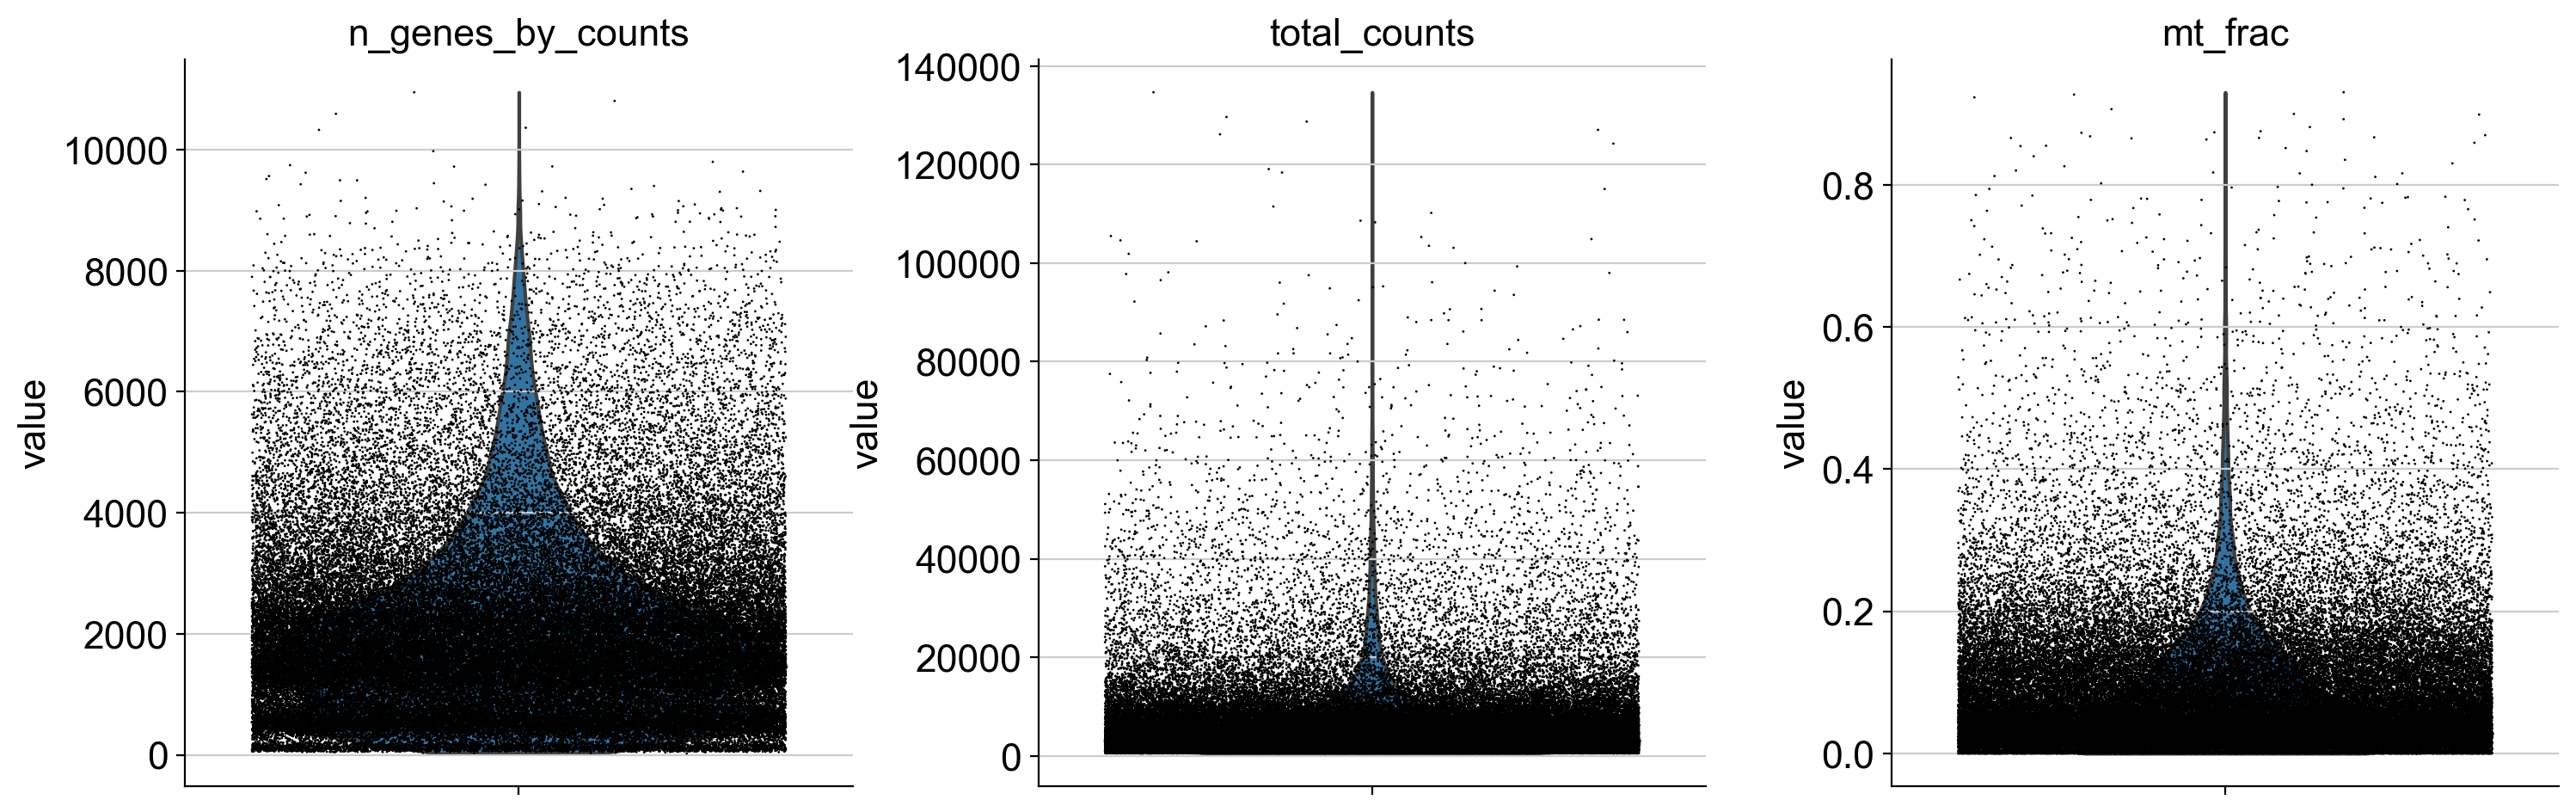

In [28]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

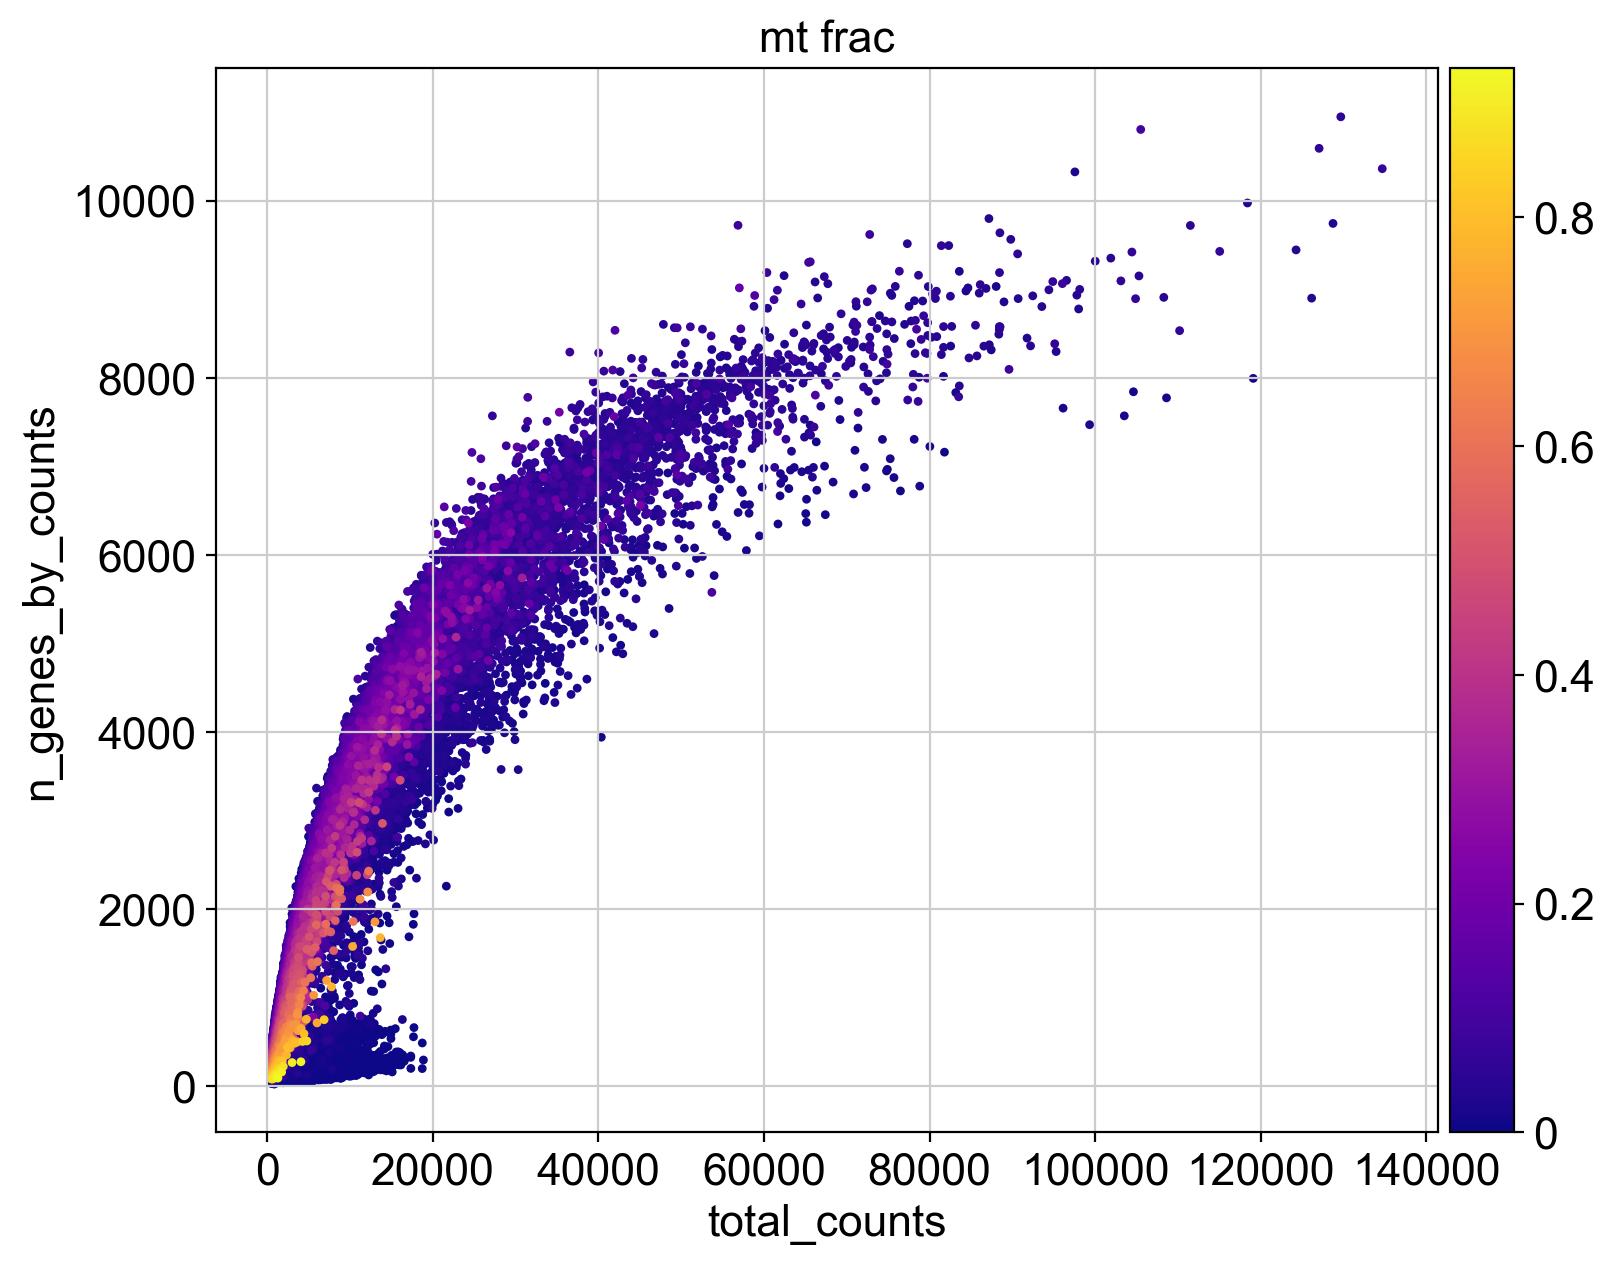

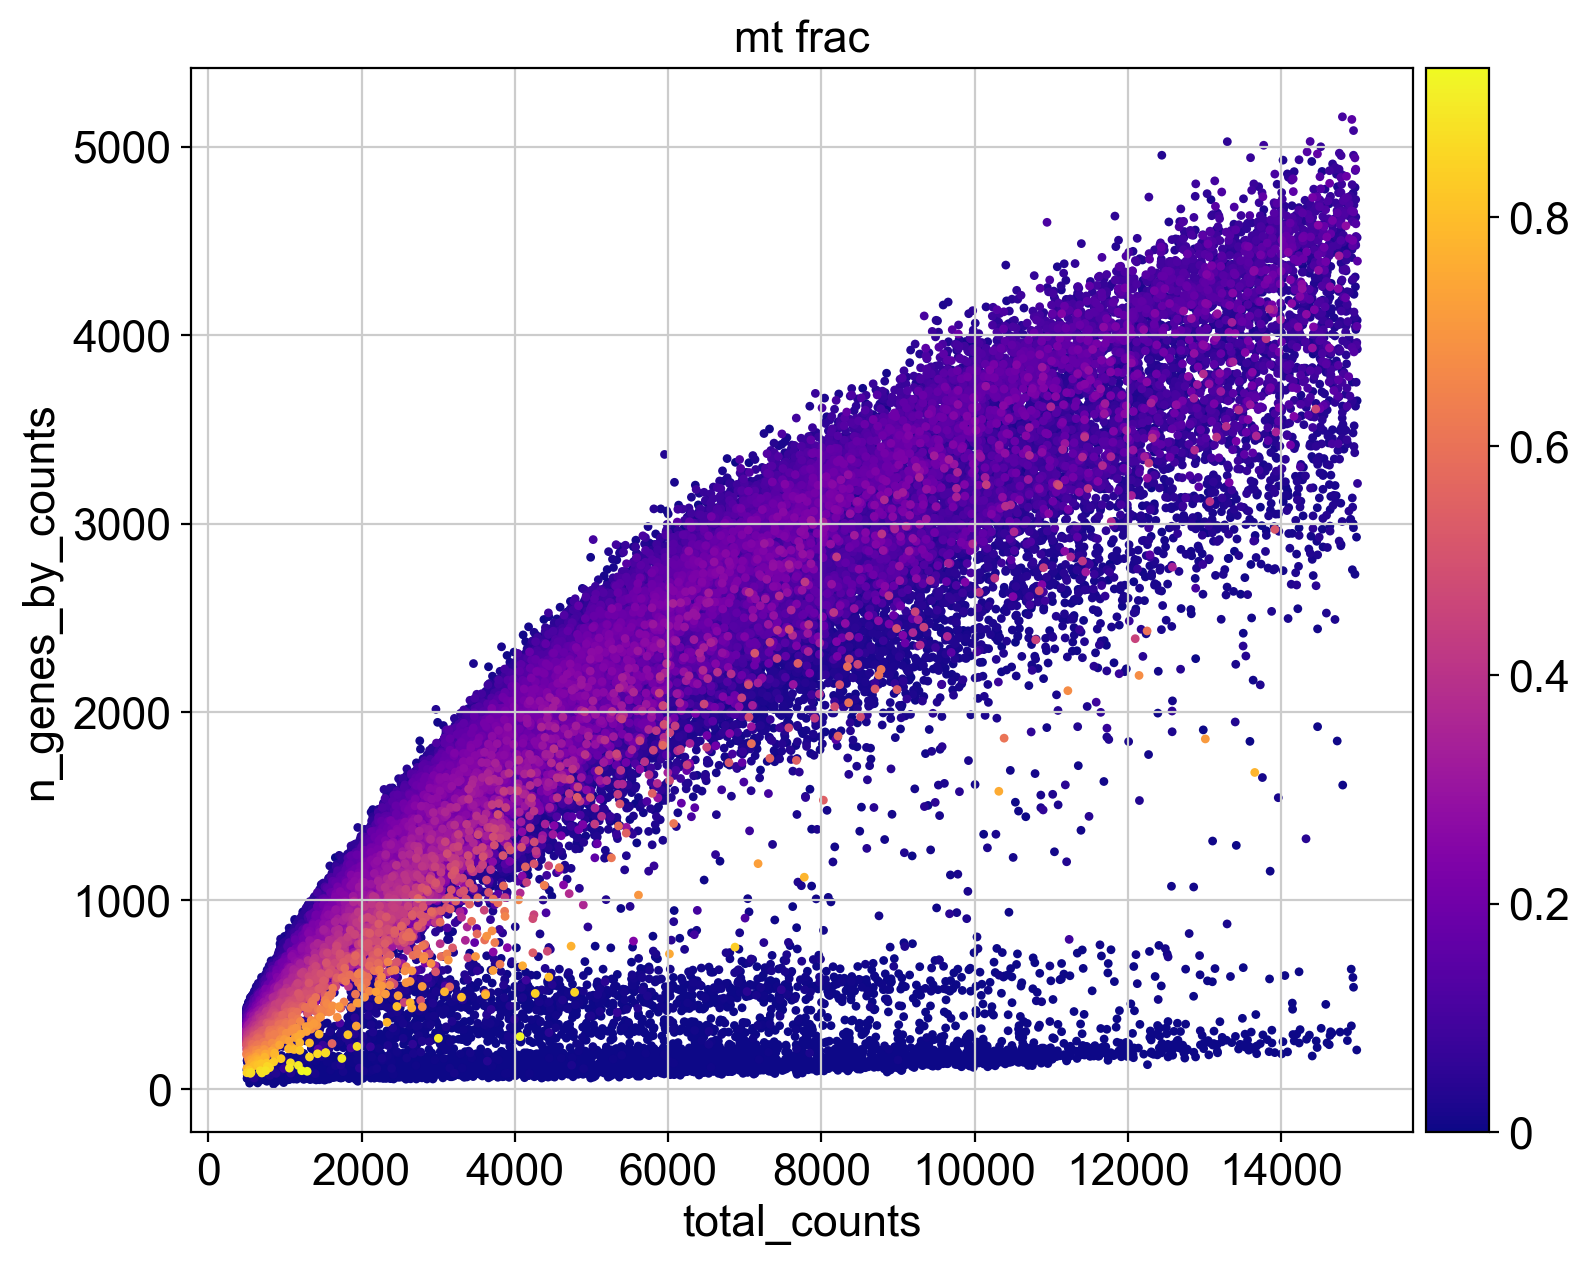

In [29]:
#Data quality summary plots
rcParams['figure.figsize']=(7,7)
p1 = sc.pl.scatter(adata, 'total_counts', 'n_genes_by_counts', color='mt_frac', size=40)
p2 = sc.pl.scatter(adata[adata.obs['total_counts']<15000], 'total_counts', 'n_genes_by_counts', 
                   color='mt_frac', size=40)

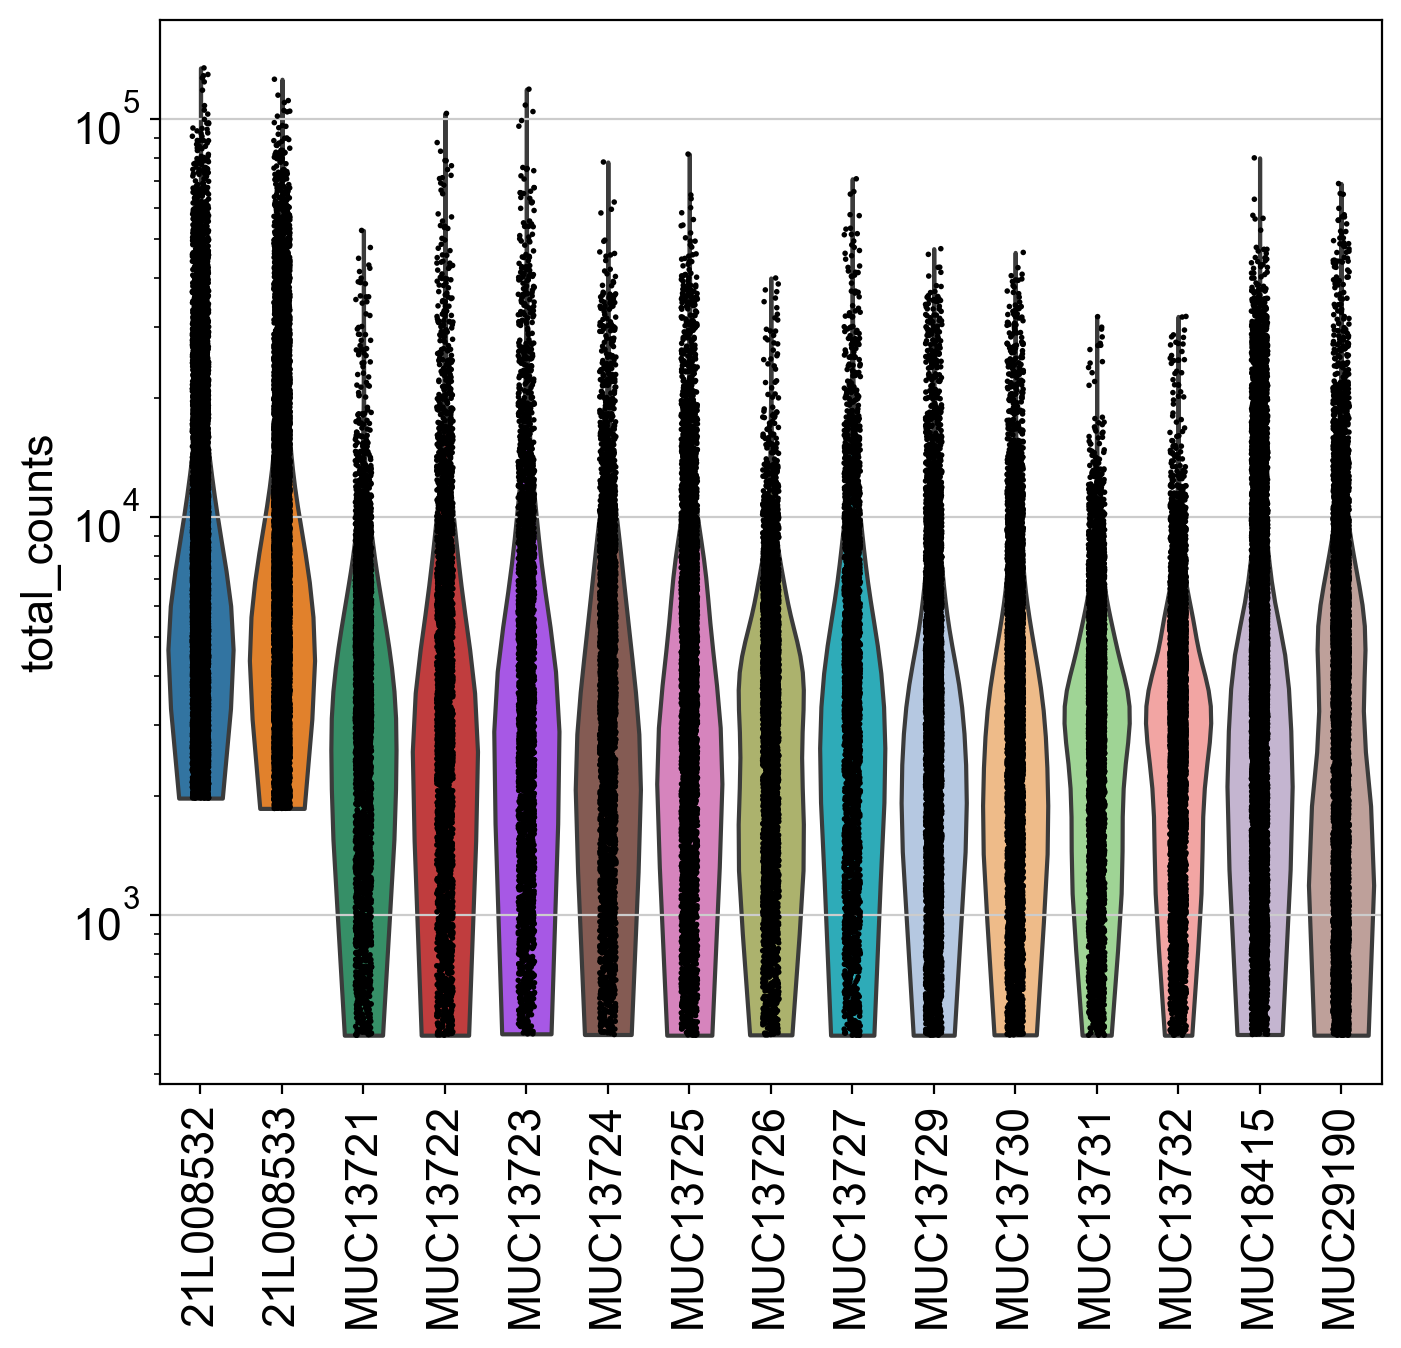

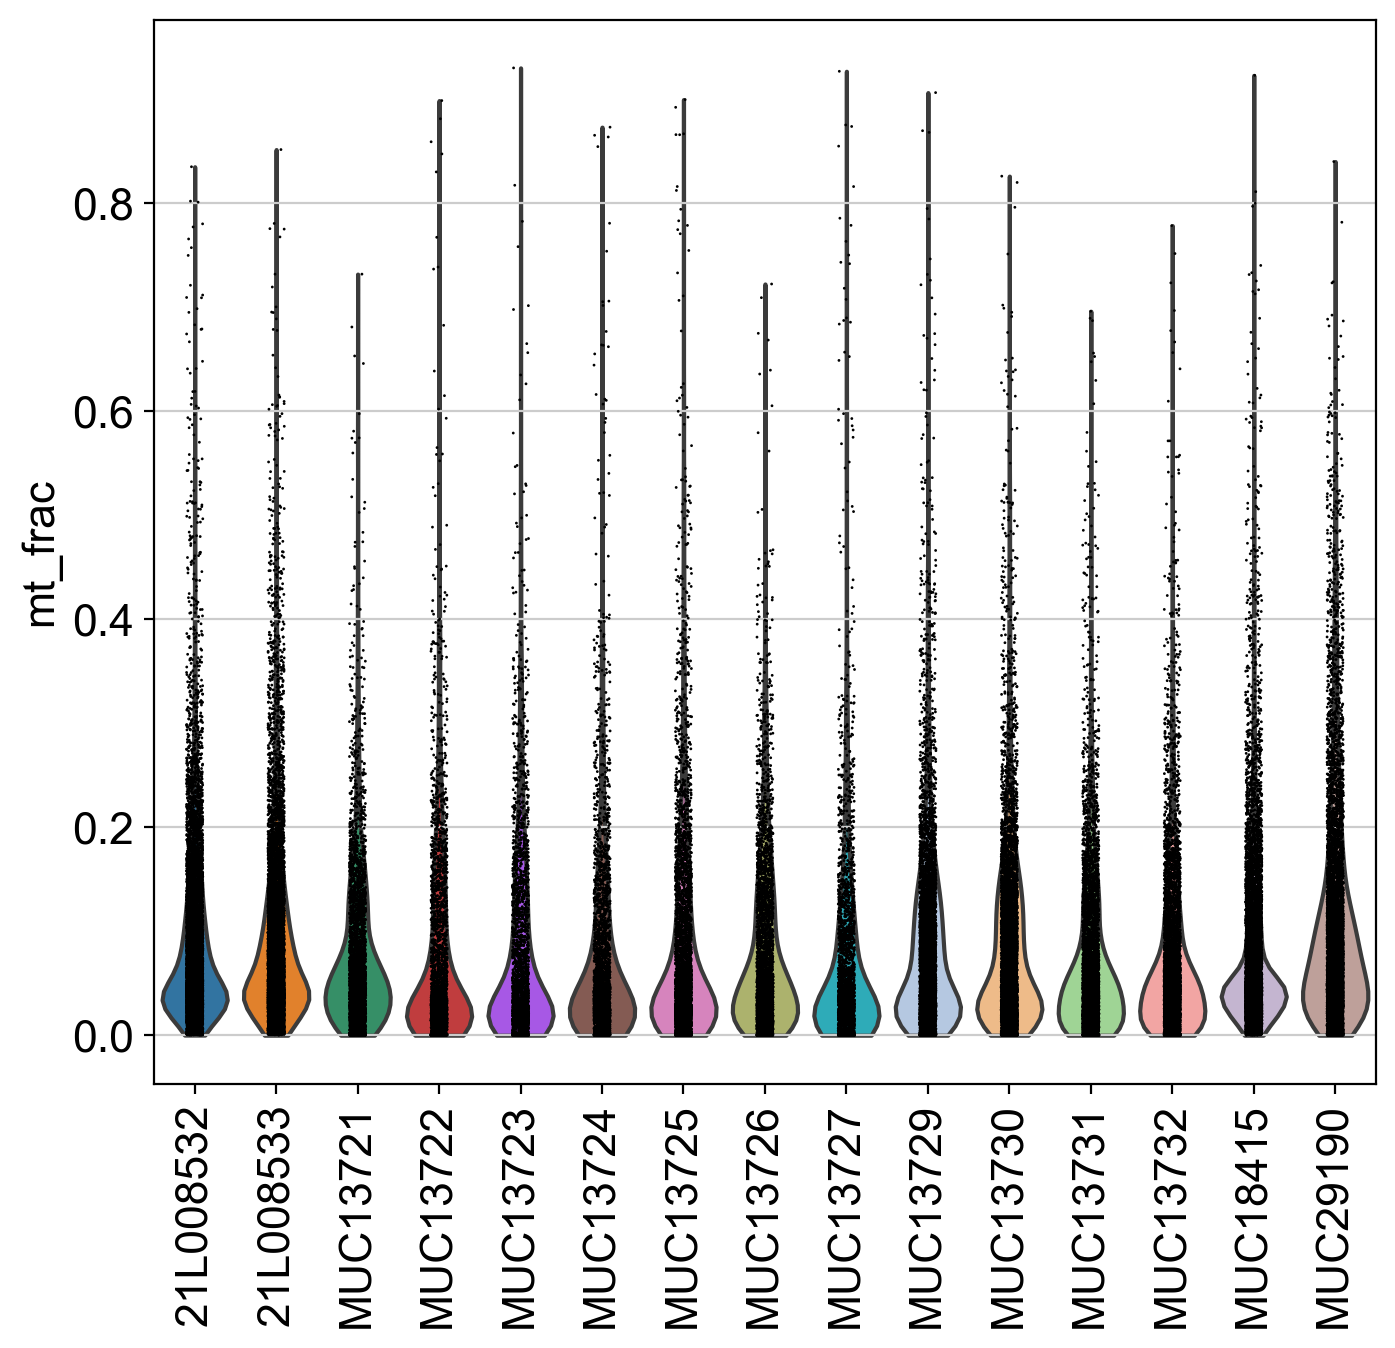

In [30]:
#Sample quality plots
rcParams['figure.figsize']=(7,7) #set figure size
t1 = sc.pl.violin(adata, 'total_counts',rotation=90,
                  groupby='sample_id',
                  size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'mt_frac',rotation=90,
                  groupby='sample_id',)

normalizing counts per cell
    finished (0:00:01)


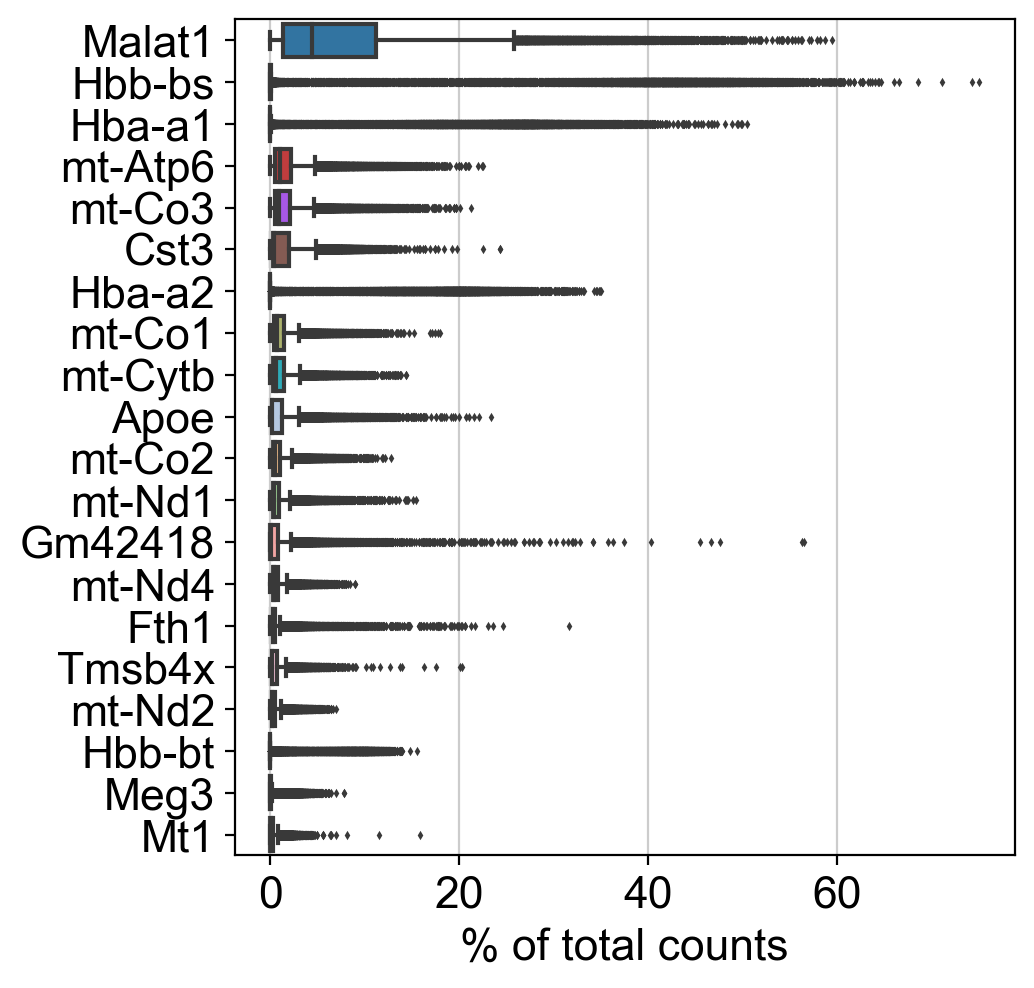

In [31]:
sc.pl.highest_expr_genes(adata, n_top=20)

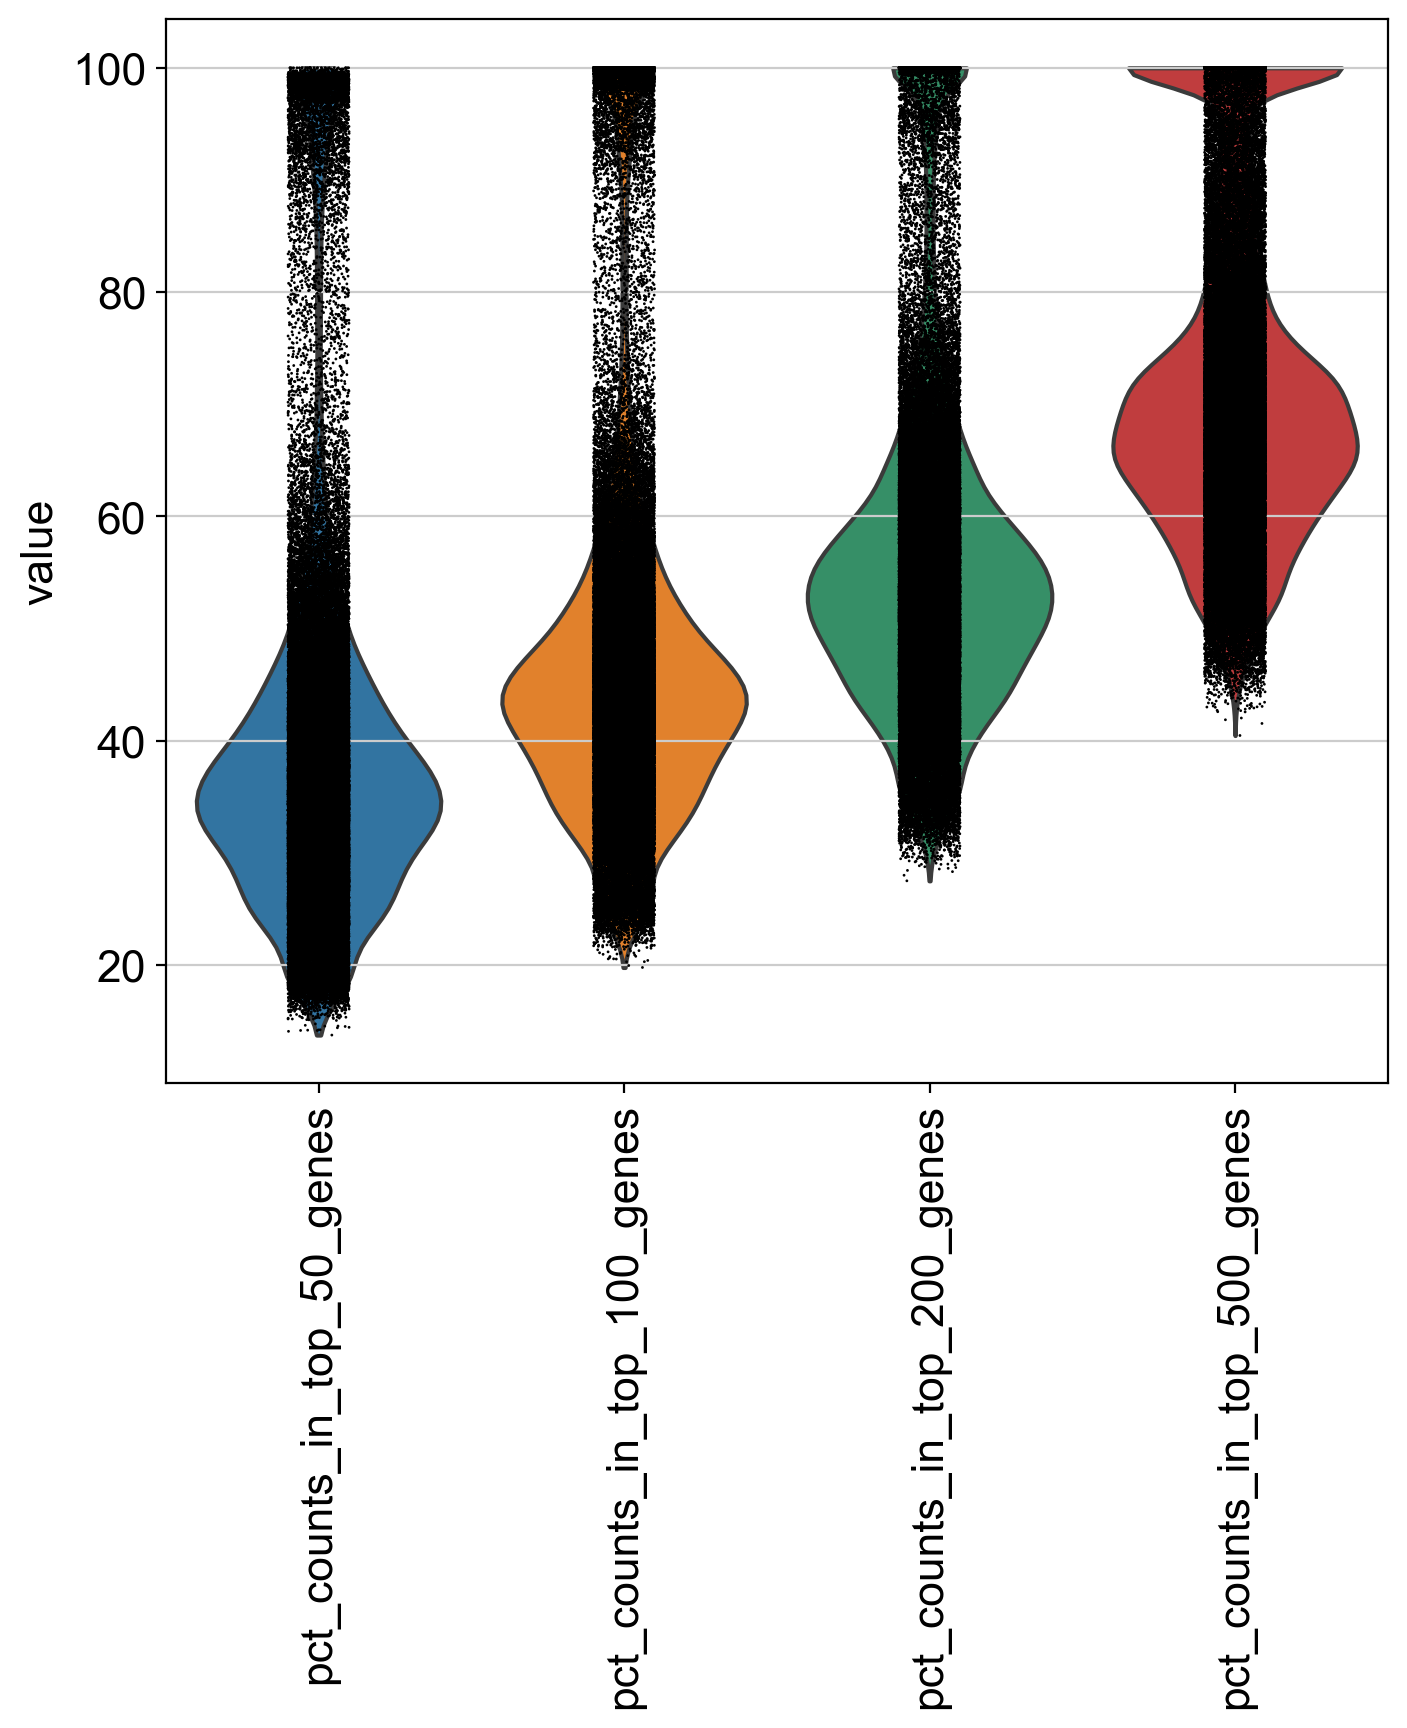

In [32]:
#Sample quality plots
rcParams['figure.figsize']=(7,7) #set figure size
t3 = sc.pl.violin(adata, keys=['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 
                     'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
                    ], rotation = 90)


/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


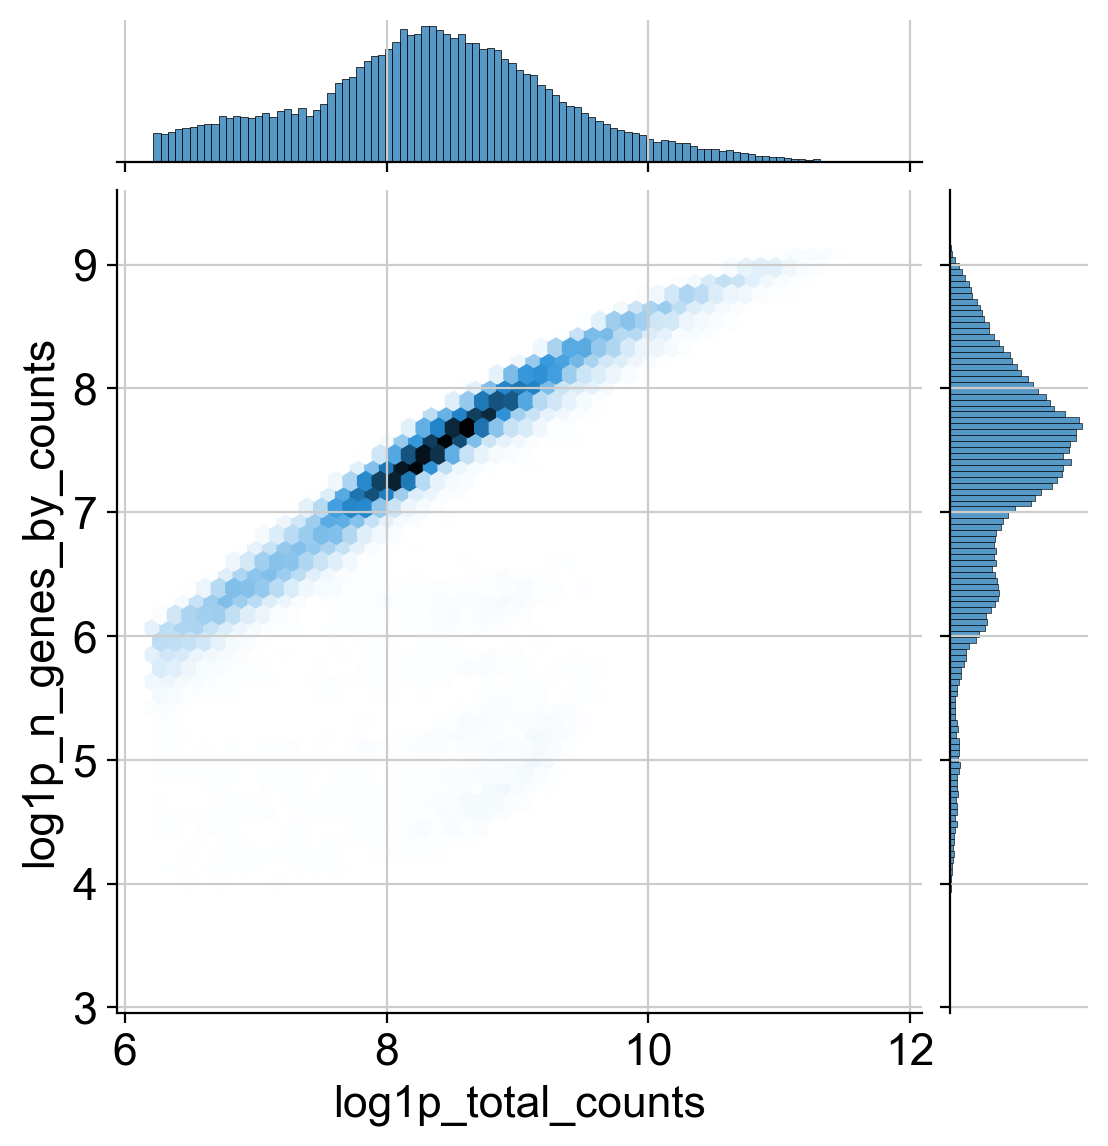

In [33]:
sb.jointplot(
        "log1p_total_counts", 
        "log1p_n_genes_by_counts",
        data=adata.obs, kind="hex"
    )

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

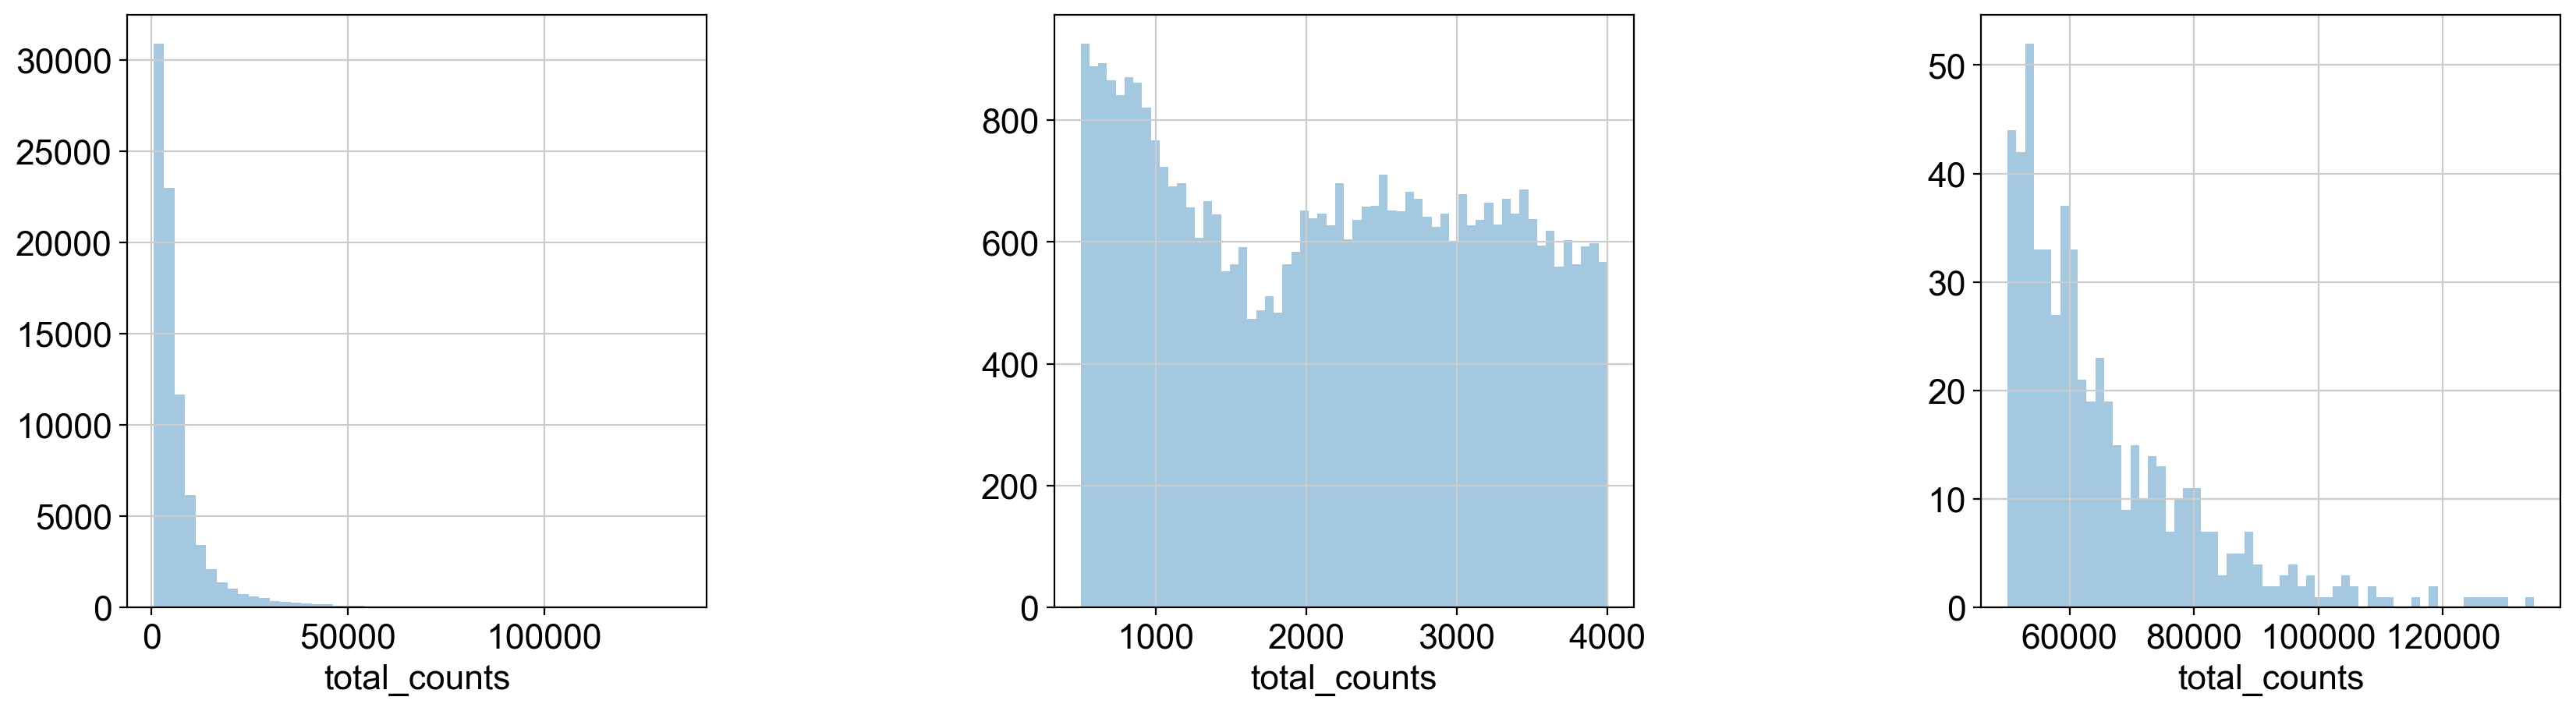

In [34]:
#Thresholding decision: counts
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 134)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p3 = sb.distplot(adata.obs['total_counts'], 
                 kde=False, 
                 ax=fig.add_subplot(fig_ind[0]))
p4 = sb.distplot(adata.obs['total_counts'][adata.obs['total_counts']<4000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[1]))
p5 = sb.distplot(adata.obs['total_counts'][adata.obs['total_counts']>50000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[2]))
plt.show()

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


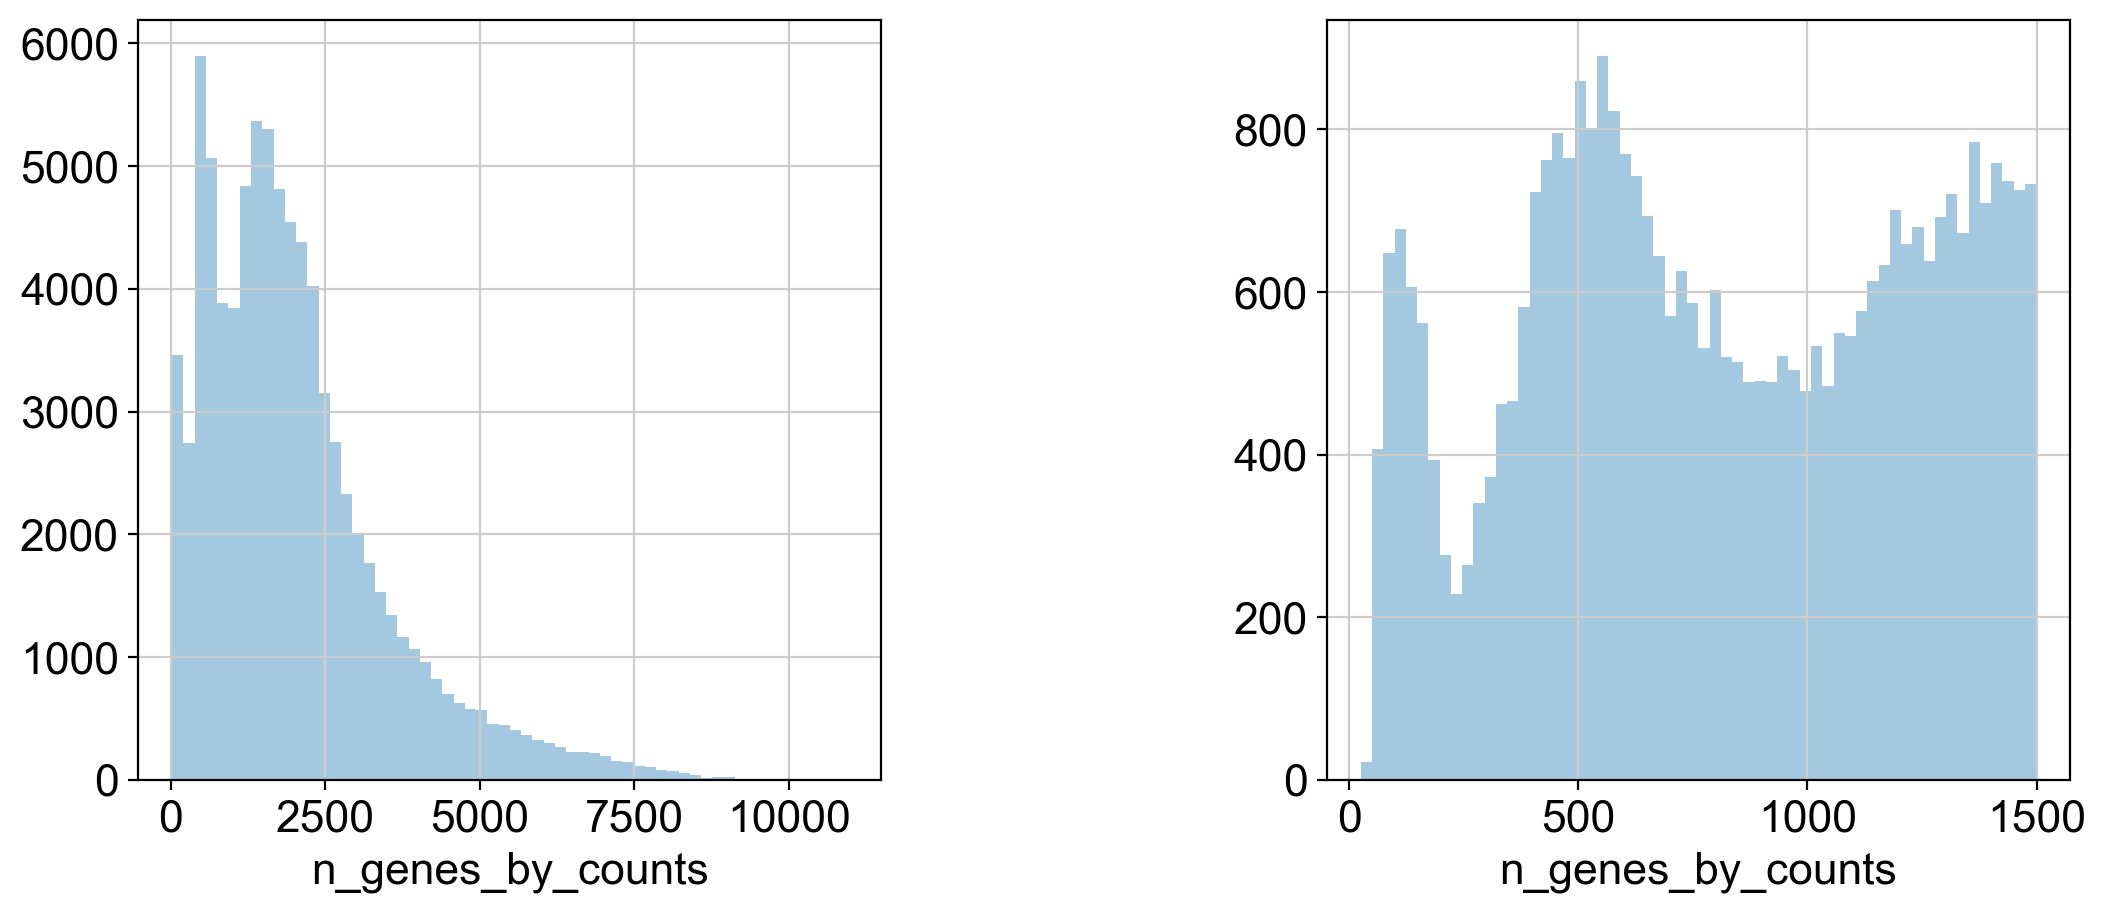

In [35]:
#Thresholding decision: genes

rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6) #create a grid for subplots

p6 = sb.distplot(adata.obs['n_genes_by_counts'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))

p7 = sb.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<1500], 
                 kde=False, bins=60, ax=fig.add_subplot(fig_ind[1]))
plt.show()

In [36]:
adata_1 = adata[np.in1d(adata.obs['sample_id'],['MUC13721','MUC13722', 'MUC13723', 'MUC13724', 'MUC13725'])].copy()
adata_2 = adata[np.in1d(adata.obs['sample_id'],['MUC13726', 'MUC13727', 'MUC13729', 'MUC13730', 'MUC13731', 'MUC13732'])].copy()
adata_3 = adata[np.in1d(adata.obs['sample_id'],['MUC18415'])].copy()
adata_4 = adata[np.in1d(adata.obs['sample_id'],['MUC29190'])].copy()
adata_5 = adata[np.in1d(adata.obs['sample_id'],['21L008532', '21L008533',])].copy()

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

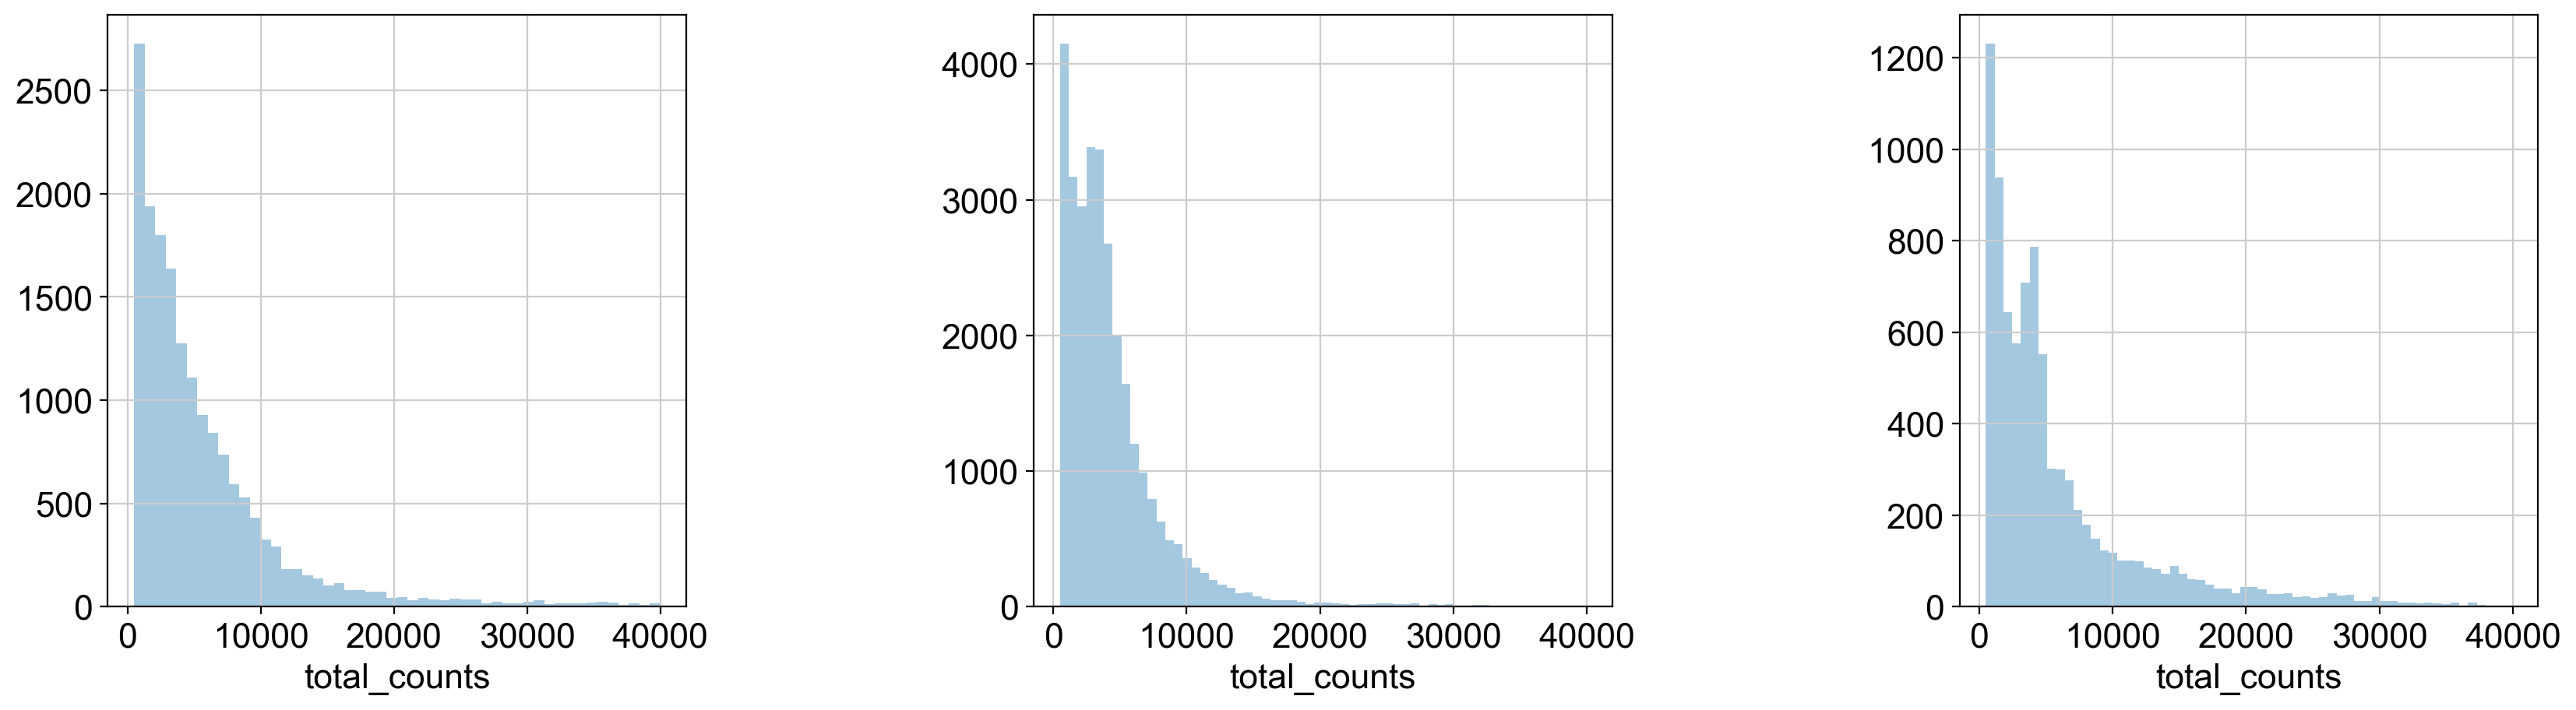

In [37]:
#Thresholding decision: counts
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 134)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p3 = sb.distplot(adata_1.obs['total_counts'][adata_1.obs['total_counts']<40000], 
                 kde=False, 
                 ax=fig.add_subplot(fig_ind[0]))
p4 = sb.distplot(adata_2.obs['total_counts'][adata_2.obs['total_counts']<40000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[1]))
p5 = sb.distplot(adata_3.obs['total_counts'][adata_3.obs['total_counts']<40000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[2]))

plt.show()

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


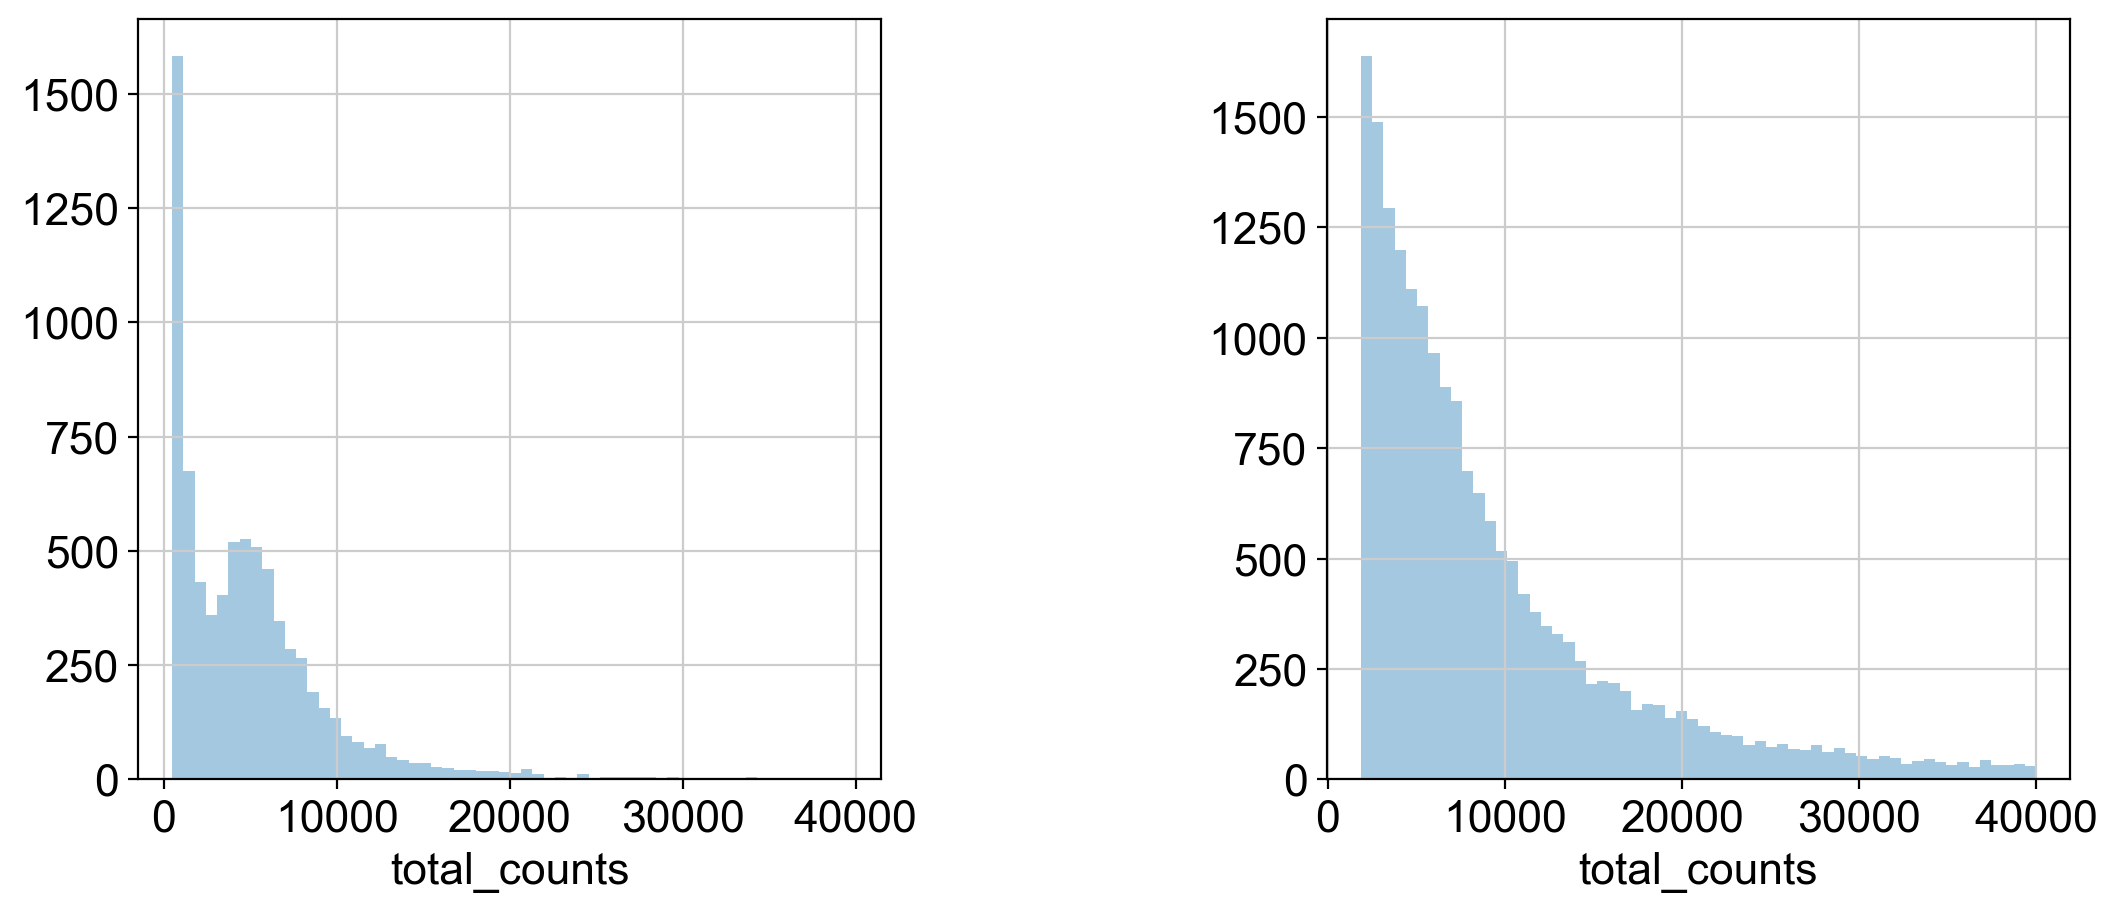

In [38]:
#Thresholding decision: counts
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 134)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p6 = sb.distplot(adata_4.obs['total_counts'][adata_4.obs['total_counts']<40000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[0]))
p7 = sb.distplot(adata_5.obs['total_counts'][adata_5.obs['total_counts']<40000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[1]))
plt.show()

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


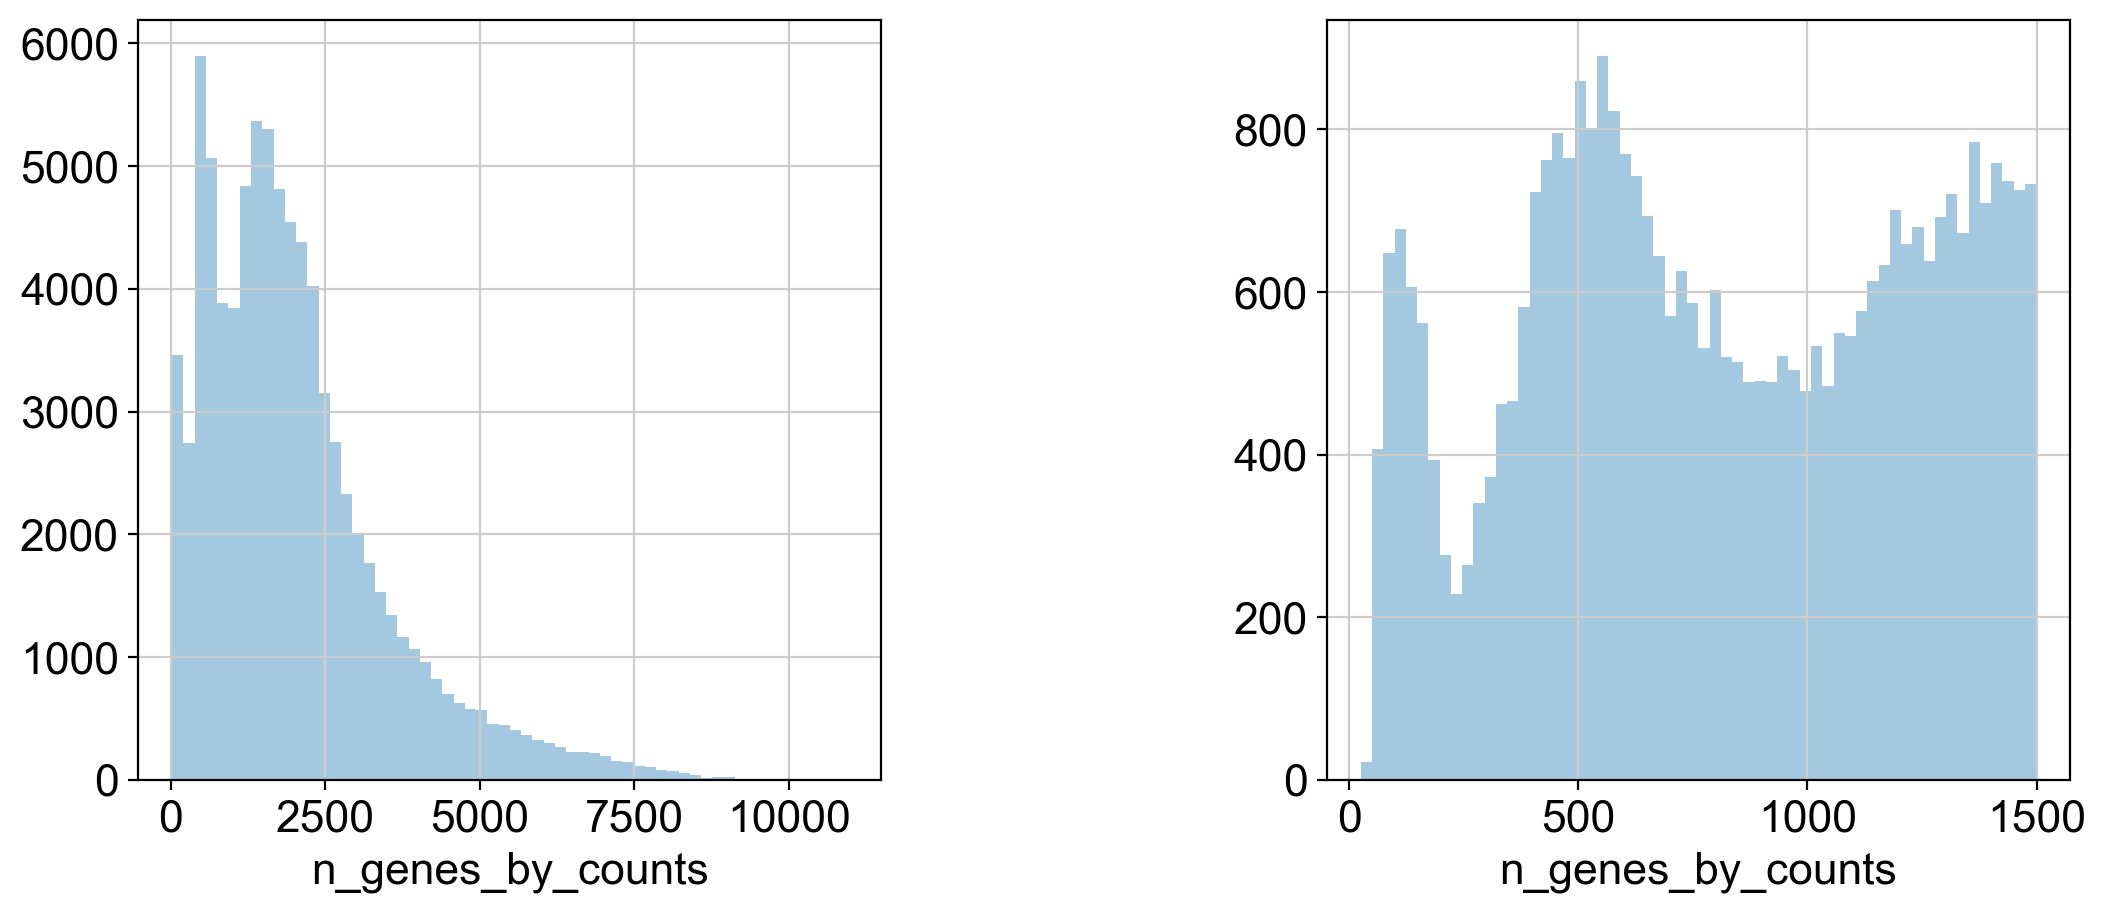

In [39]:
#Thresholding decision: genes

rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6) #create a grid for subplots

p6 = sb.distplot(adata.obs['n_genes_by_counts'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))

p7 = sb.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<1500], 
                 kde=False, bins=60, ax=fig.add_subplot(fig_ind[1]))
plt.show()

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

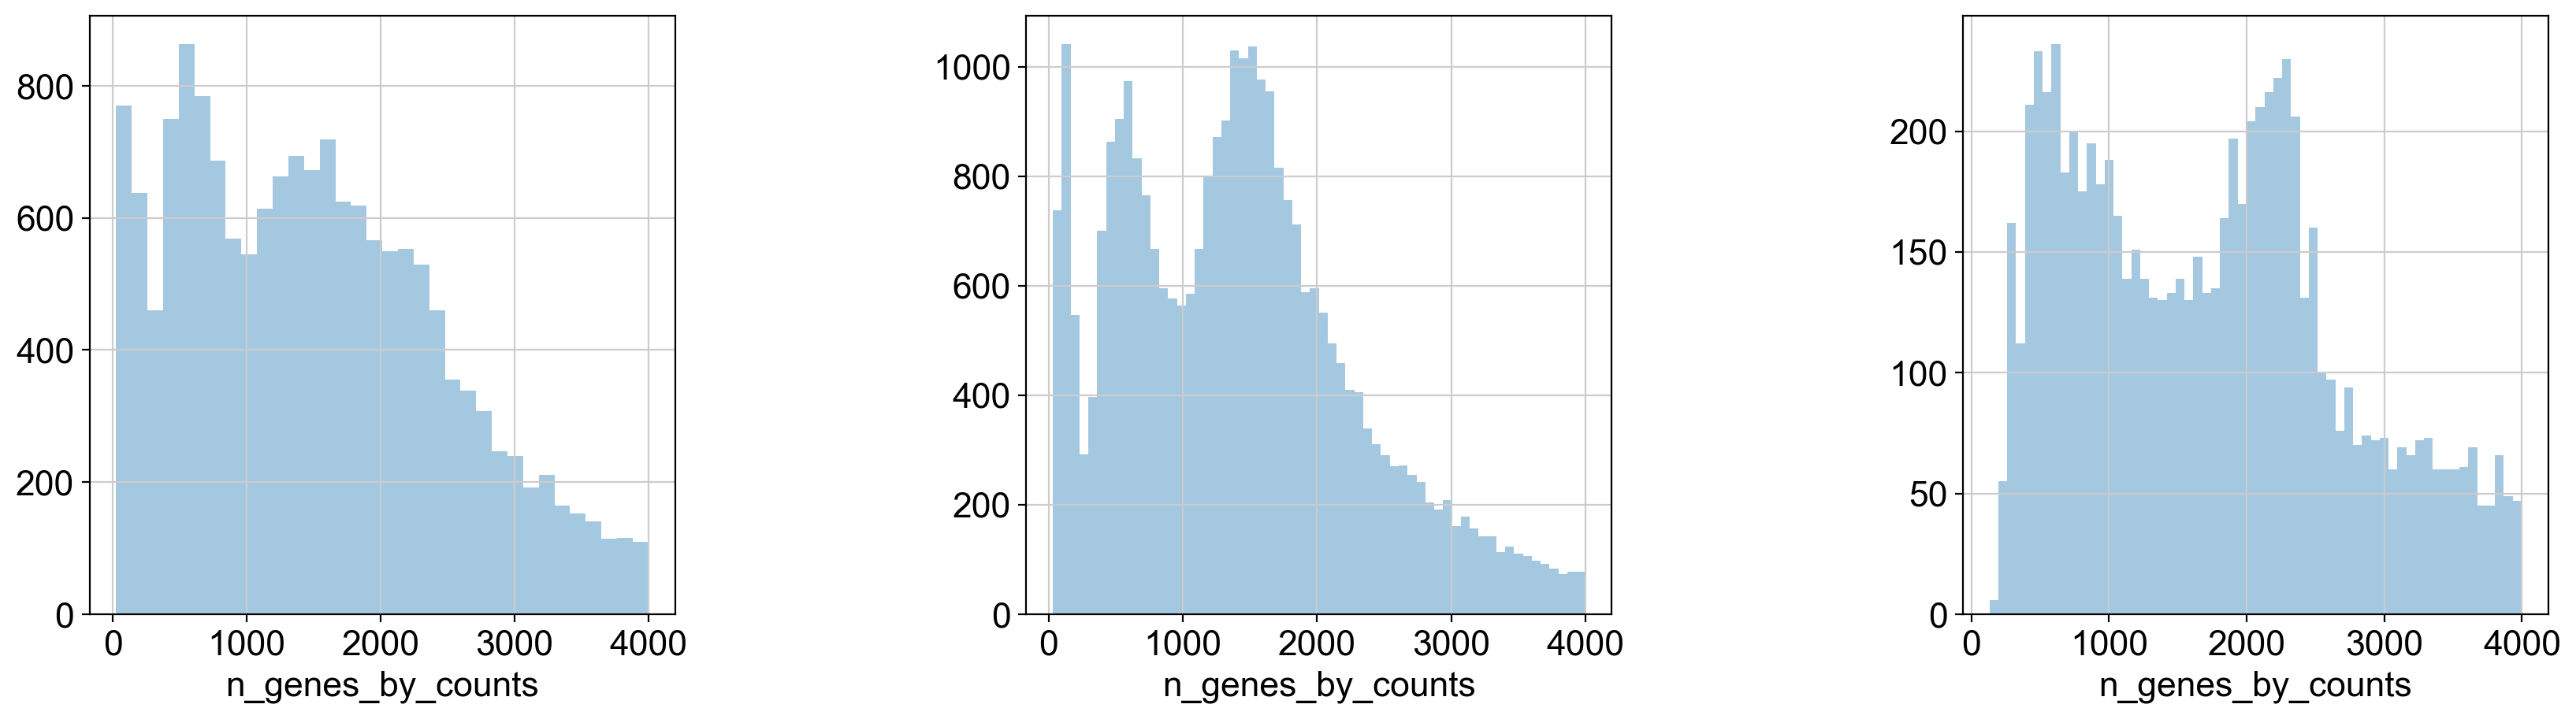

In [40]:
#Thresholding decision: counts
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 134)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p3 = sb.distplot(adata_1.obs['n_genes_by_counts'][adata_1.obs['n_genes_by_counts']<4000], 
                 kde=False, 
                 ax=fig.add_subplot(fig_ind[0]))
p4 = sb.distplot(adata_2.obs['n_genes_by_counts'][adata_2.obs['n_genes_by_counts']<4000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[1]))
p5 = sb.distplot(adata_3.obs['n_genes_by_counts'][adata_3.obs['n_genes_by_counts']<4000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[2]))

plt.show()

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


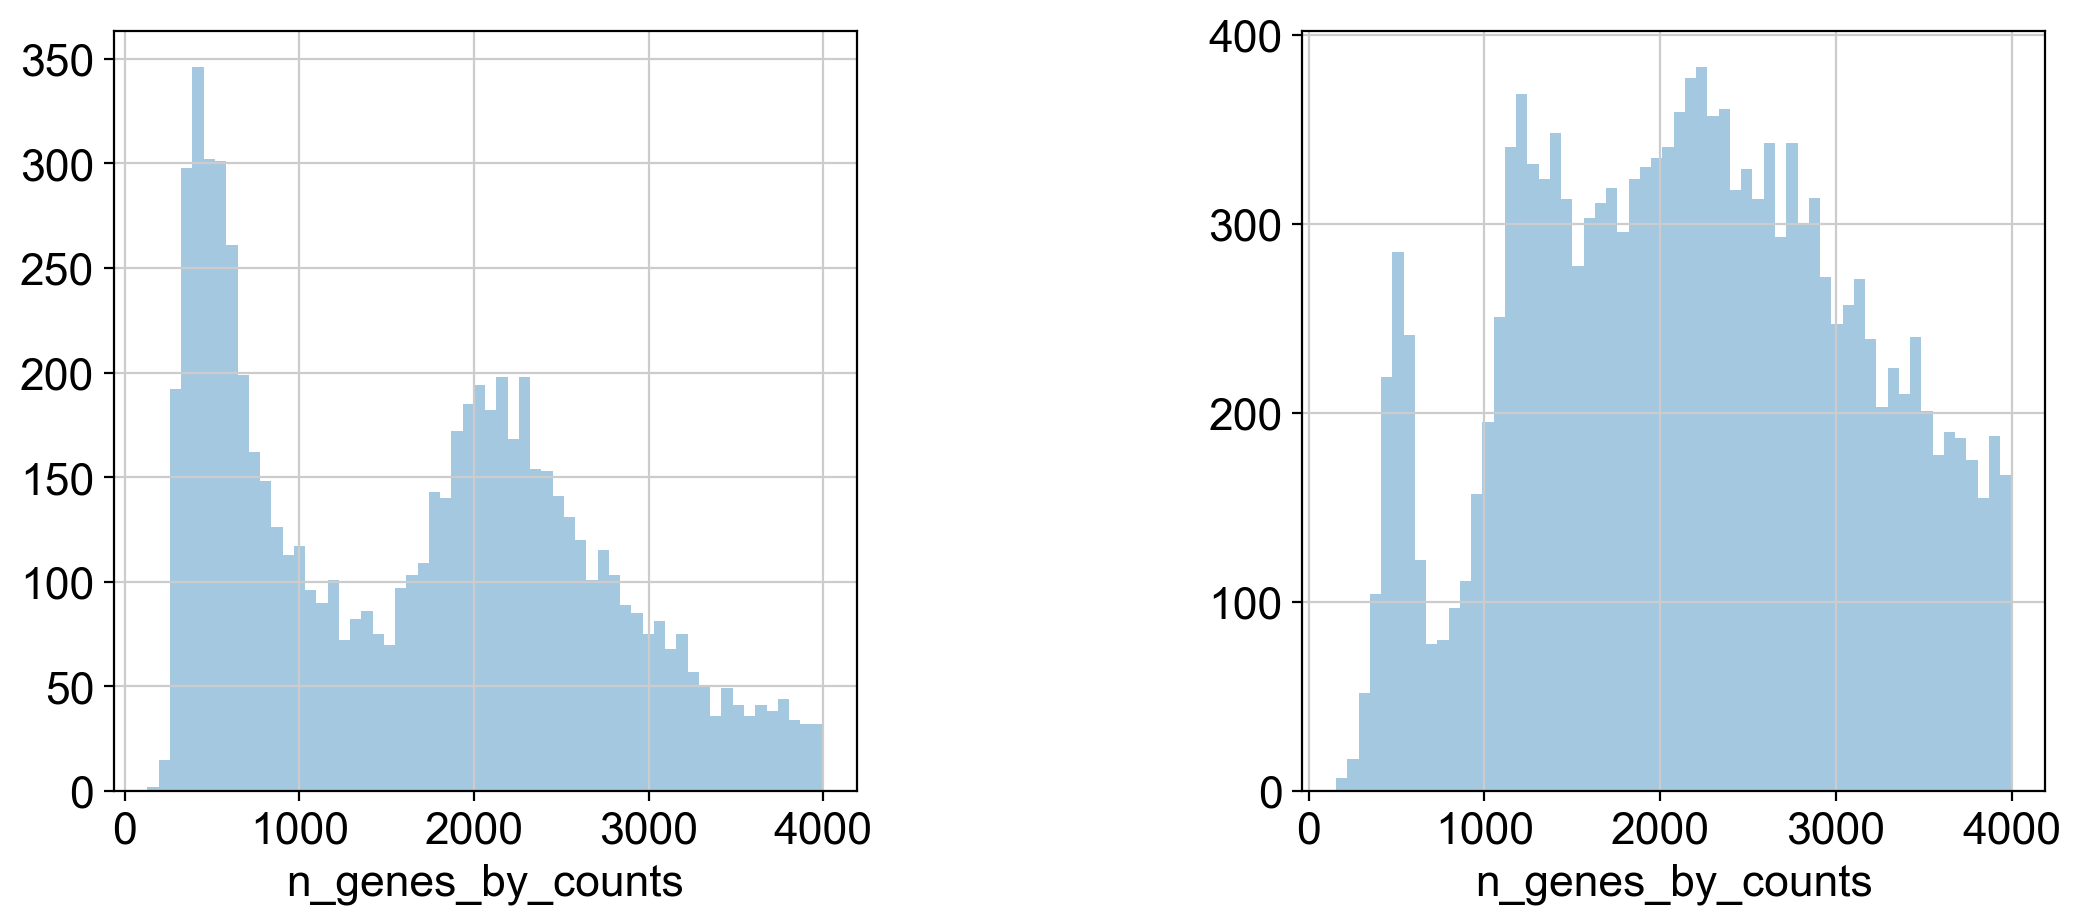

In [41]:
#Thresholding decision: counts
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 134)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p6 = sb.distplot(adata_4.obs['n_genes_by_counts'][adata_4.obs['n_genes_by_counts']<4000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[0]))
p7 = sb.distplot(adata_5.obs['n_genes_by_counts'][adata_5.obs['n_genes_by_counts']<4000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[1]))
plt.show()

Create a histogram for the fraction of mitochondrial genes. Further, create a histogram for the high fraction regime, each.

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


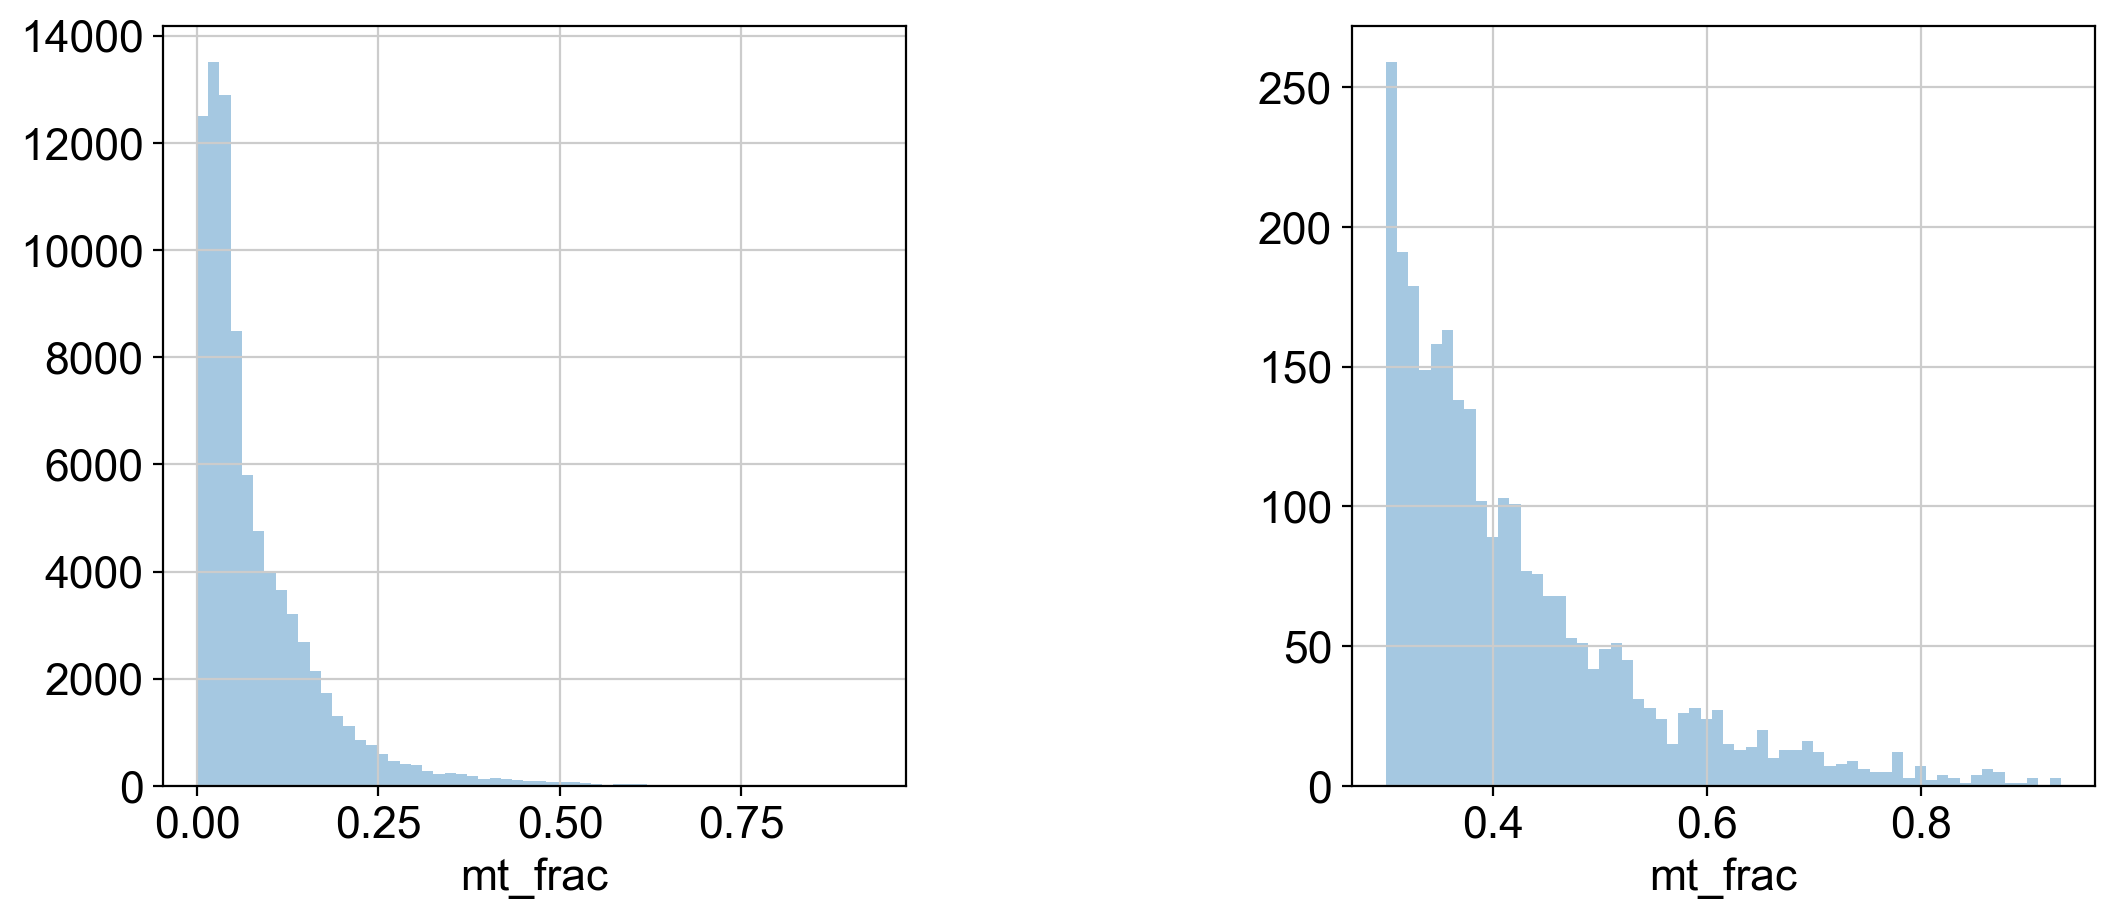

In [42]:
#Thresholding decision: mitochondrial reads

rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p8 = sb.distplot(adata.obs['mt_frac'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))

p9 = sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac']>0.3], 
                 kde=False, bins=60, ax=fig.add_subplot(fig_ind[1]))
plt.show()

In [43]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 50000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.25]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 1000)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 83833
filtered out 574 cells that have more than 50000 counts
Number of cells after max count filter: 83259
Number of cells after MT filter: 78941
filtered out 19421 cells that have less than 1000 genes expressed


Trying to set attribute `.obs` of view, copying.


Number of cells after gene filter: 59520


In [44]:
#dooble check annotation
pd.crosstab(adata.obs['sample_id'],adata.obs['condition'])

condition  3dpi_CTRL  3dpi_INH  5dpi_CTRL  5dpi_INH  INTACT
sample_id                                                  
21L008532          0         0       8871         0       0
21L008533          0         0          0      8348       0
MUC13721           0         0          0         0    2749
MUC13722        1890         0          0         0       0
MUC13723        1833         0          0         0       0
MUC13724           0      1926          0         0       0
MUC13725           0      2846          0         0       0
MUC13726           0         0          0         0    2564
MUC13727           0         0       1761         0       0
MUC13729           0         0          0      4014       0
MUC13730           0         0          0      4127       0
MUC13731           0         0          0         0    3510
MUC13732           0         0          0         0    3897
MUC18415           0         0       6209         0       0
MUC29190           0         0          0         0    4975

In [45]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 27998
filtered out 8708 genes that are detected in less than 20 cells
Number of genes after cell filter: 19290


### Doublet score

In [46]:
adata.obs['doublet_score']= np.zeros(adata.shape[0])
adata.obs['doublet'] = np.zeros(adata.shape[0])

In [47]:
# filtering/preprocessing parameters:
min_counts = 2
min_cells = 3
vscore_percentile = 85
n_pc = 50

# doublet detector parameters:
expected_doublet_rate = 0.02 
sim_doublet_ratio = 3
n_neighbors = 15



scrub = scr.Scrublet(counts_matrix = adata.X,  
                     n_neighbors = n_neighbors,
                     sim_doublet_ratio = sim_doublet_ratio,
                     expected_doublet_rate = expected_doublet_rate)

doublet_scores, predicted_doublets = scrub.scrub_doublets( 
                    min_counts = min_counts, 
                    min_cells = min_cells, 
                    n_prin_comps = n_pc,
                    use_approx_neighbors = True, 
                    get_doublet_neighbor_parents = False)

adata.obs['doublet_score'] = doublet_scores
adata.obs['doublet'] = predicted_doublets


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.13
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 45.3%
Overall doublet rate:
	Expected   = 2.0%
	Estimated  = 3.3%
Elapsed time: 73.2 seconds


/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


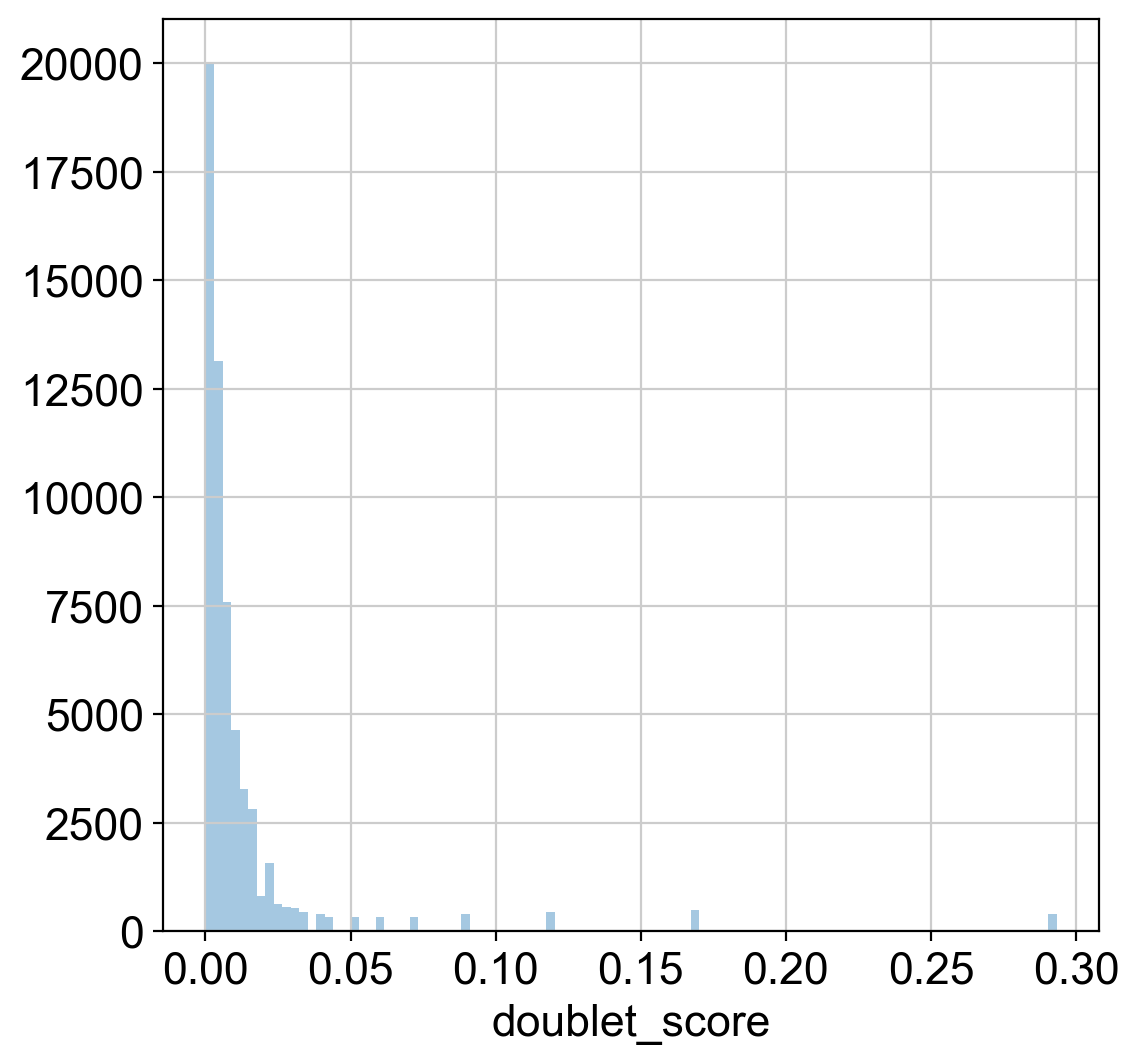

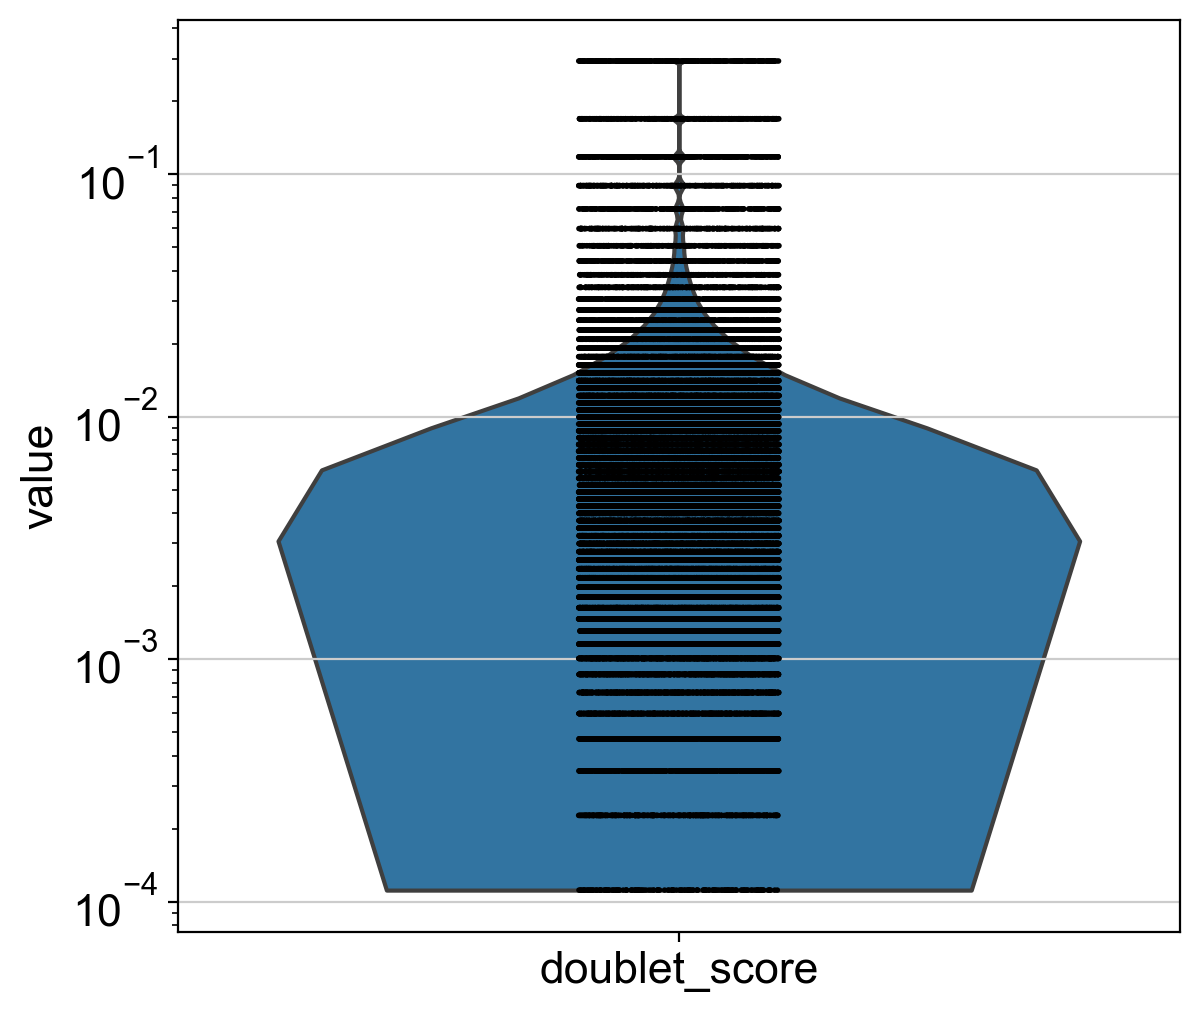

In [48]:
rcParams['figure.figsize']=(6,6)
sb.distplot(adata.obs['doublet_score'], bins=100, kde=False)
plt.show()


sc.pl.violin(adata, 'doublet_score',
                  size=2, log=True, cut=0)

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


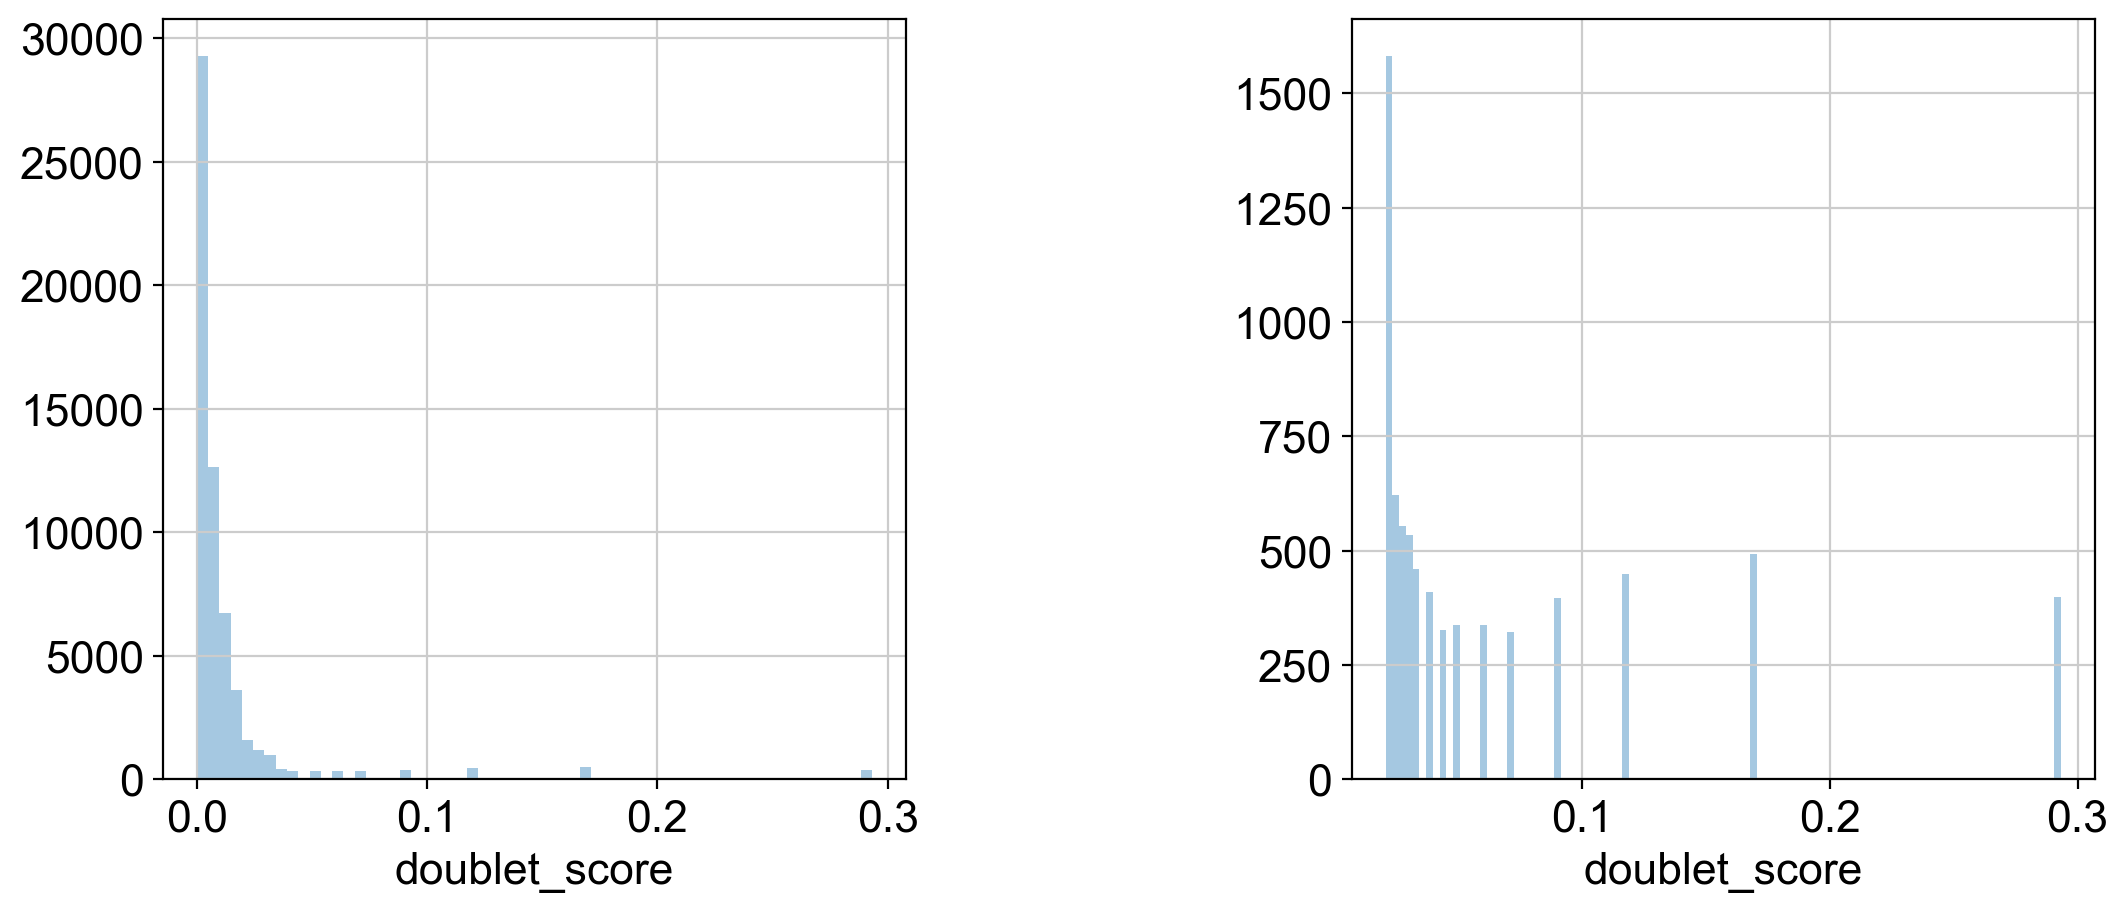

In [49]:
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p8 = sb.distplot(adata.obs['doublet_score'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))

p9 = sb.distplot(adata.obs['doublet_score'][adata.obs['doublet_score']>0.02], 
                 kde=False, bins=100, ax=fig.add_subplot(fig_ind[1]))
plt.show()

### filtering doublets

In [50]:
thr = 0.05
ix_filt = adata.obs['doublet_score']<=thr

adata = adata[ix_filt].copy()
print('Number of cells after doublet filter: {:d}'.format(adata.n_obs))

Number of cells after doublet filter: 56786


In [51]:
#dooble check annotation
pd.crosstab(adata.obs['sample_id'],adata.obs['condition'])

condition  3dpi_CTRL  3dpi_INH  5dpi_CTRL  5dpi_INH  INTACT
sample_id                                                  
21L008532          0         0       8308         0       0
21L008533          0         0          0      7910       0
MUC13721           0         0          0         0    2676
MUC13722        1850         0          0         0       0
MUC13723        1796         0          0         0       0
MUC13724           0      1867          0         0       0
MUC13725           0      2750          0         0       0
MUC13726           0         0          0         0    2474
MUC13727           0         0       1716         0       0
MUC13729           0         0          0      3836       0
MUC13730           0         0          0      3914       0
MUC13731           0         0          0         0    3389
MUC13732           0         0          0         0    3766
MUC18415           0         0       5874         0       0
MUC29190           0         0          0         0    4660

### Summarize sample information

In [52]:
adata

AnnData object with n_obs × n_vars = 56786 × 19290
    obs: 'sample_id', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'doublet_score', 'doublet'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'sample_id_colors'

In [53]:
adata.obs['condition'] = adata.obs['sample_id'].map(sample_id2condition).astype('category')

In [54]:
#dooble check annotation
pd.crosstab(adata.obs['sample_id'],adata.obs['condition'])

condition  3dpi_CTRL  3dpi_INH  5dpi_CTRL  5dpi_INH  INTACT
sample_id                                                  
21L008532          0         0       8308         0       0
21L008533          0         0          0      7910       0
MUC13721           0         0          0         0    2676
MUC13722        1850         0          0         0       0
MUC13723        1796         0          0         0       0
MUC13724           0      1867          0         0       0
MUC13725           0      2750          0         0       0
MUC13726           0         0          0         0    2474
MUC13727           0         0       1716         0       0
MUC13729           0         0          0      3836       0
MUC13730           0         0          0      3914       0
MUC13731           0         0          0         0    3389
MUC13732           0         0          0         0    3766
MUC18415           0         0       5874         0       0
MUC29190           0         0          0         0    4660

In [55]:
df = adata.obs[['n_genes_by_counts','total_counts', 'batch']]
df_all = pd.DataFrame(df.groupby(by='batch')['n_genes_by_counts'].apply(np.mean).values,
                      index=df.groupby(by='batch')['n_genes_by_counts'].apply(np.mean).index,
                      columns=['mean_genes'])

df_all['median_genes']=df.groupby(by='batch')['n_genes_by_counts'].apply(np.median).values
df_all['mean_counts']=df.groupby(by='batch')['total_counts'].apply(np.mean).values
df_all['median_counts']=df.groupby(by='batch')['total_counts'].apply(np.median).values
df_all

mean_genes  median_genes   mean_counts  median_counts
batch                                                        
1      2317.128805        2031.0   7608.946289         5359.0
2      2023.408484        1744.0   5566.244141         4170.0
3      2595.687606        2265.0   7955.892578         4924.5
4      2517.510300        2289.0   7031.278320         5657.5
5      3140.014367        2765.0  10681.934570         7406.0

In [56]:
#df_all.to_csv(table_dir + today+'data_overview_earlytp.csv')

Save filtered data to file.

In [57]:
adata.write(data_dir+today+'data_postQC_all_earlytp.h5ad', compression='gzip')

In [58]:
adata

AnnData object with n_obs × n_vars = 56786 × 19290
    obs: 'sample_id', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'doublet_score', 'doublet'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'sample_id_colors'

In [59]:
adata_test=sc.read(data_dir+today+'data_postQC_all_earlytp.h5ad')

In [60]:
adata_test

AnnData object with n_obs × n_vars = 56786 × 19290
    obs: 'sample_id', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'doublet_score', 'doublet'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'sample_id_colors'

## Normalization

In [61]:
rcParams['figure.figsize']=(5,5)

In [62]:
#Keep the count data in a counts layer
adata.layers["counts"] = adata.X.copy()

In [63]:
#Perform a clustering for scran normalization in clusters
adata_pp = adata.copy()
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=1e6)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15)
sc.pp.neighbors(adata_pp)
sc.tl.louvain(adata_pp, key_added='groups', resolution=0.5)

normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing PCA
    with n_comps=15
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 22 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:11)


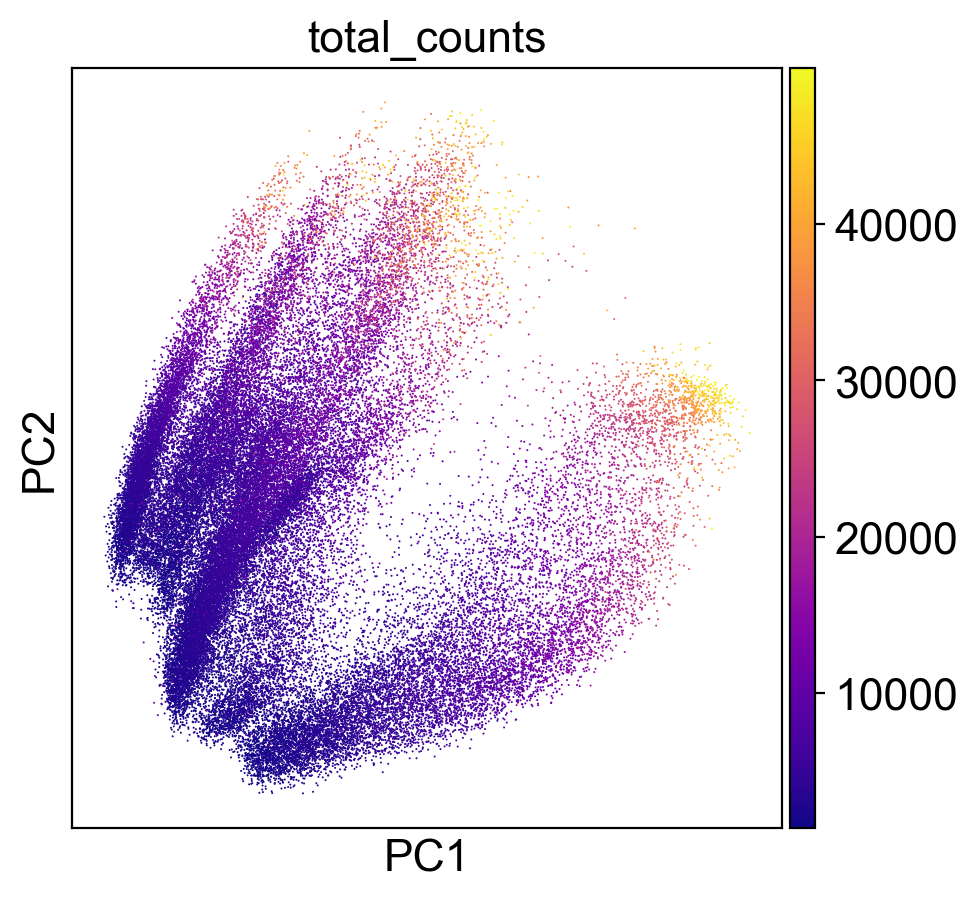

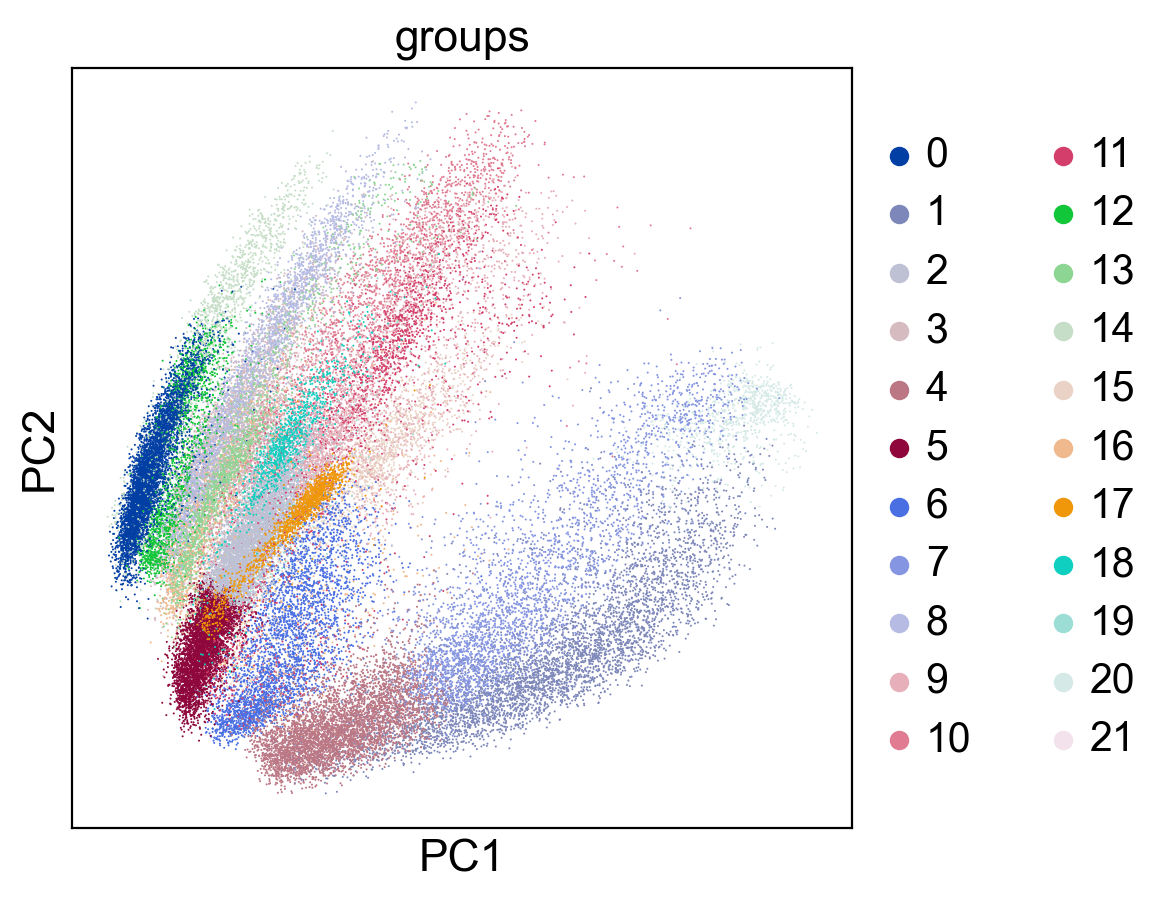

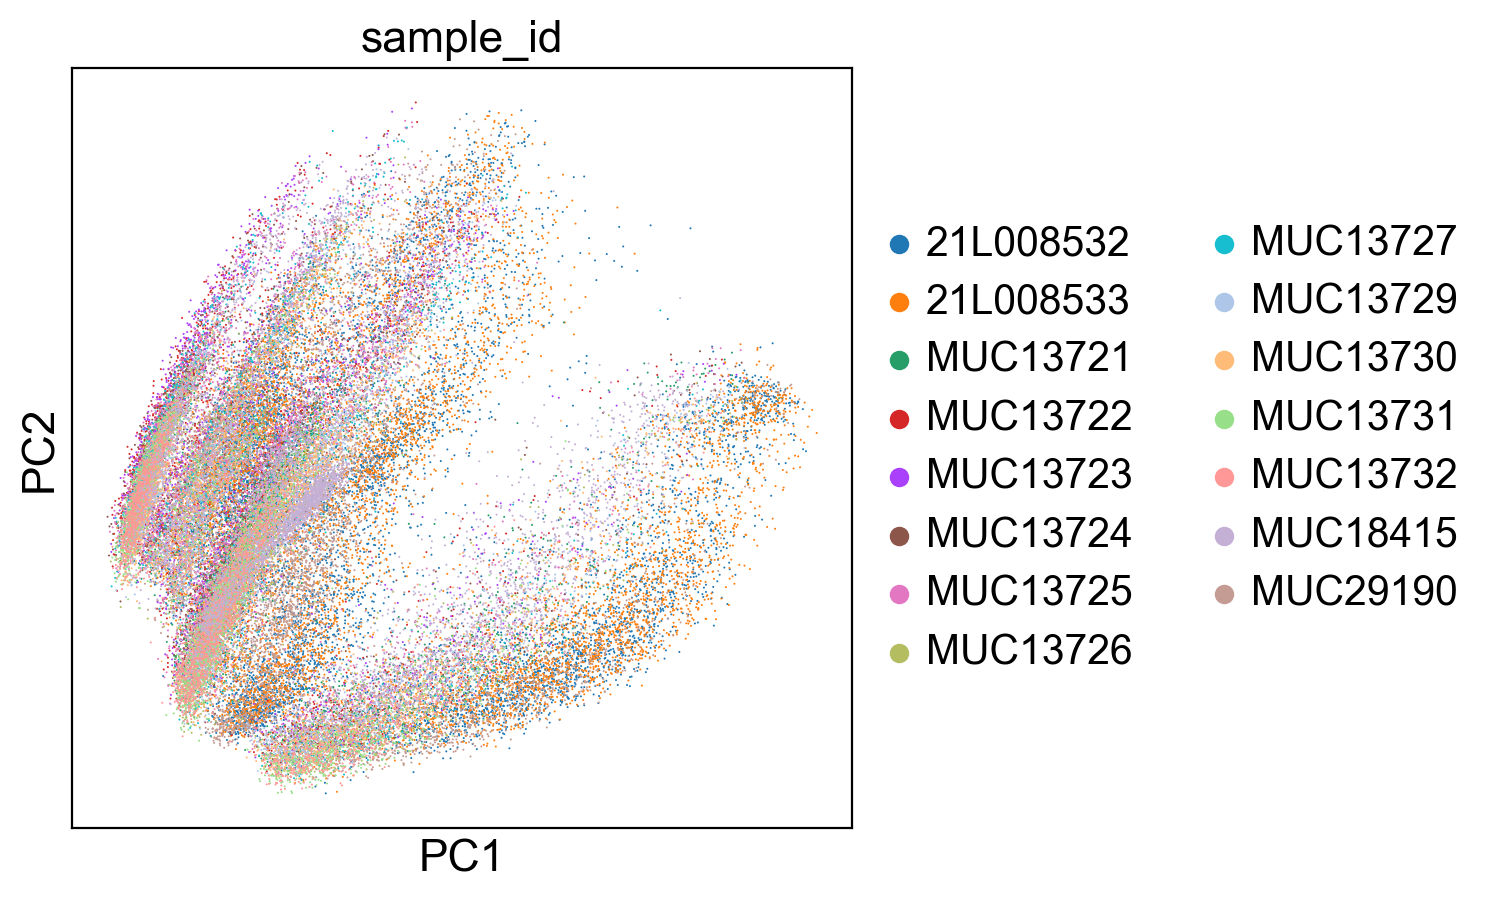

In [64]:
sc.pl.pca(adata_pp,color='total_counts')
sc.pl.pca(adata_pp,color='groups')
sc.pl.pca(adata_pp,color='sample_id')

In [65]:
#Preprocess variables for scran normalization
input_groups = adata_pp.obs['groups']
data_mat = adata.X.T

In [66]:
%%R -i data_mat -i input_groups -o size_factors
#need to wrap the "computeSumFactors(data_mat, clusters=input_groups, min.mean=0.1)" call due to version change in Bioconductor 3.11,
#see issue discussion in: https://github.com/theislab/scib/issues/141
size_factors = BiocGenerics::sizeFactors(
                      scran::computeSumFactors(
                            SingleCellExperiment::SingleCellExperiment(list(
                                  counts=data_mat
                            ))
                          )
                        )


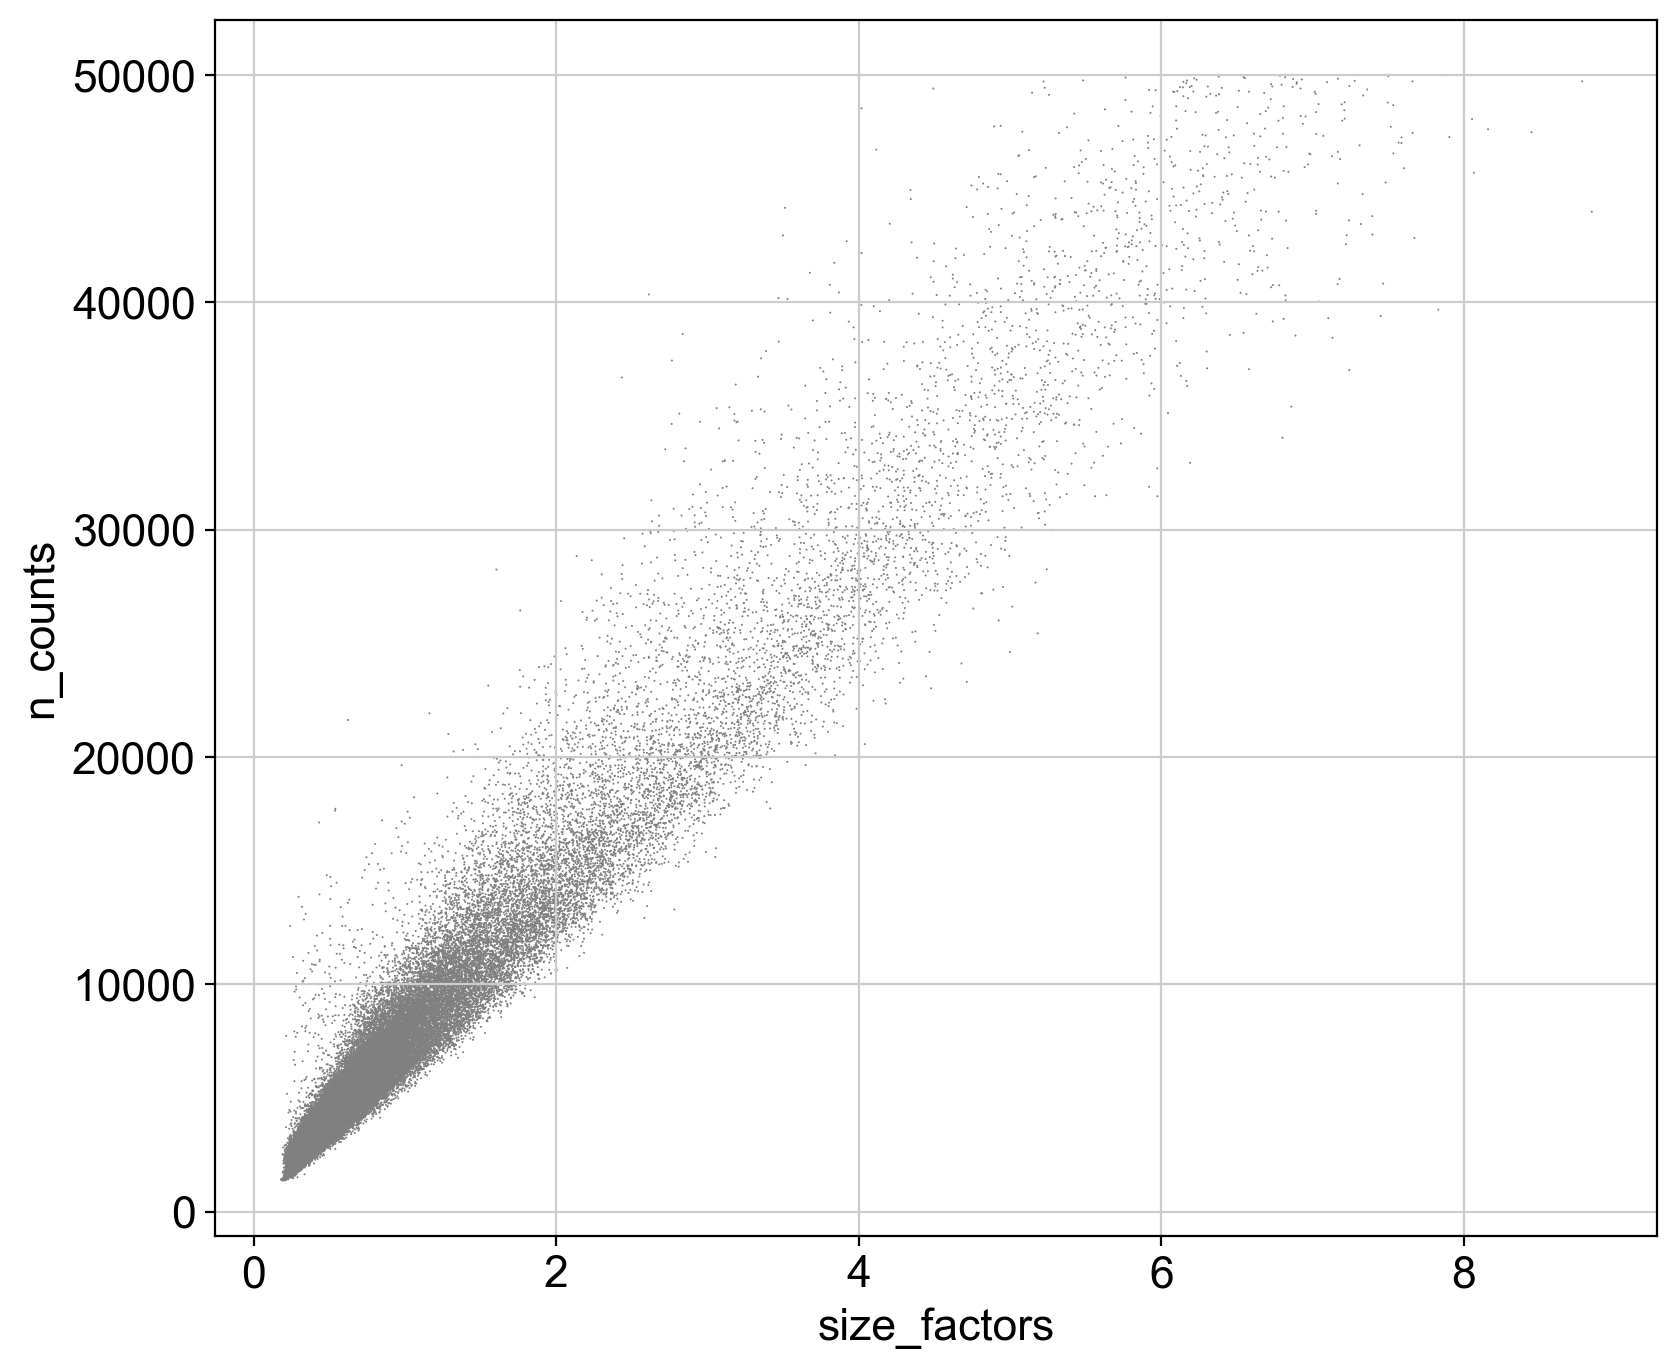

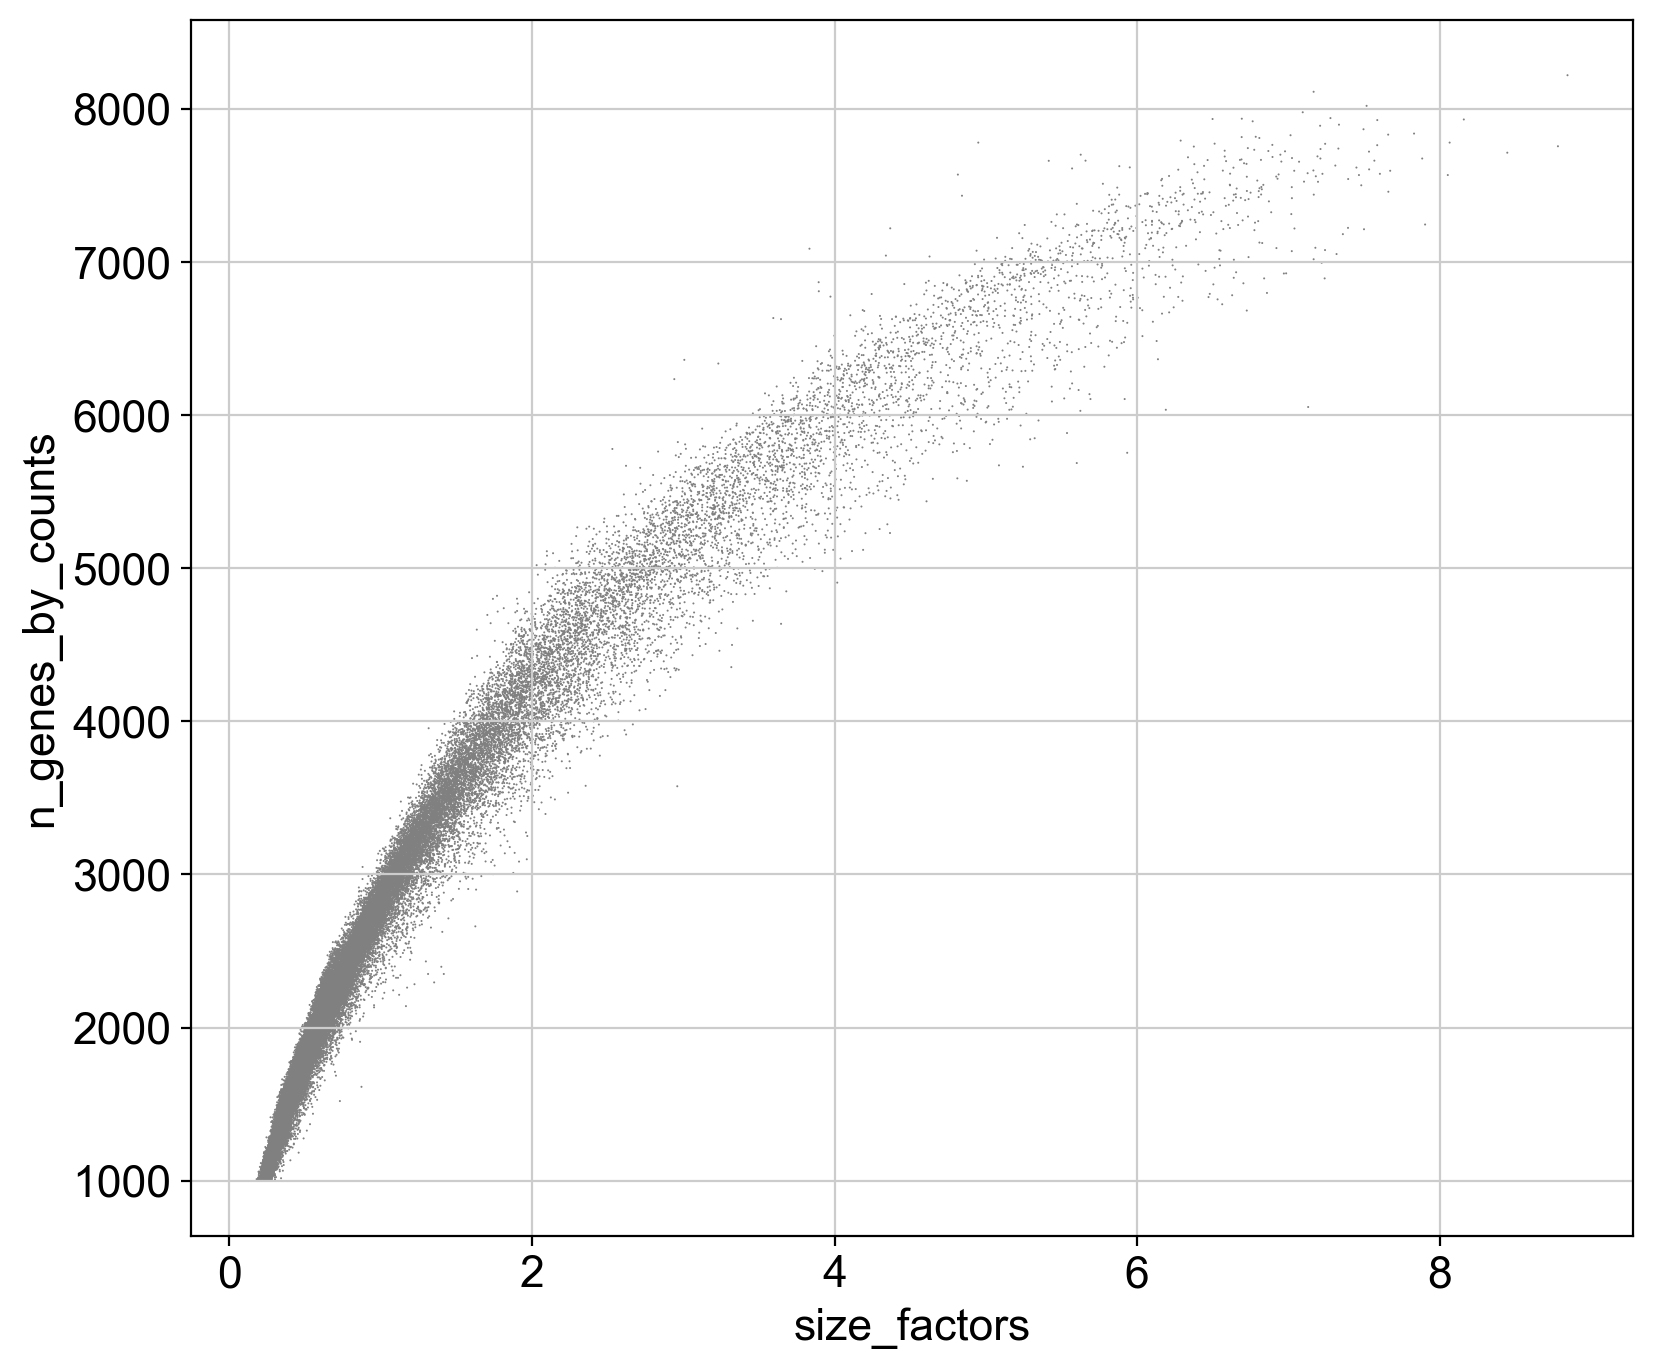

In [67]:
# Visualize the estimated size factors
adata.obs['size_factors'] = size_factors
adata_pp.obs['size_factors'] = size_factors

rcParams['figure.figsize']=(8,8)
sc.pl.scatter(adata, 'size_factors', 'n_counts')
sc.pl.scatter(adata, 'size_factors', 'n_genes_by_counts')

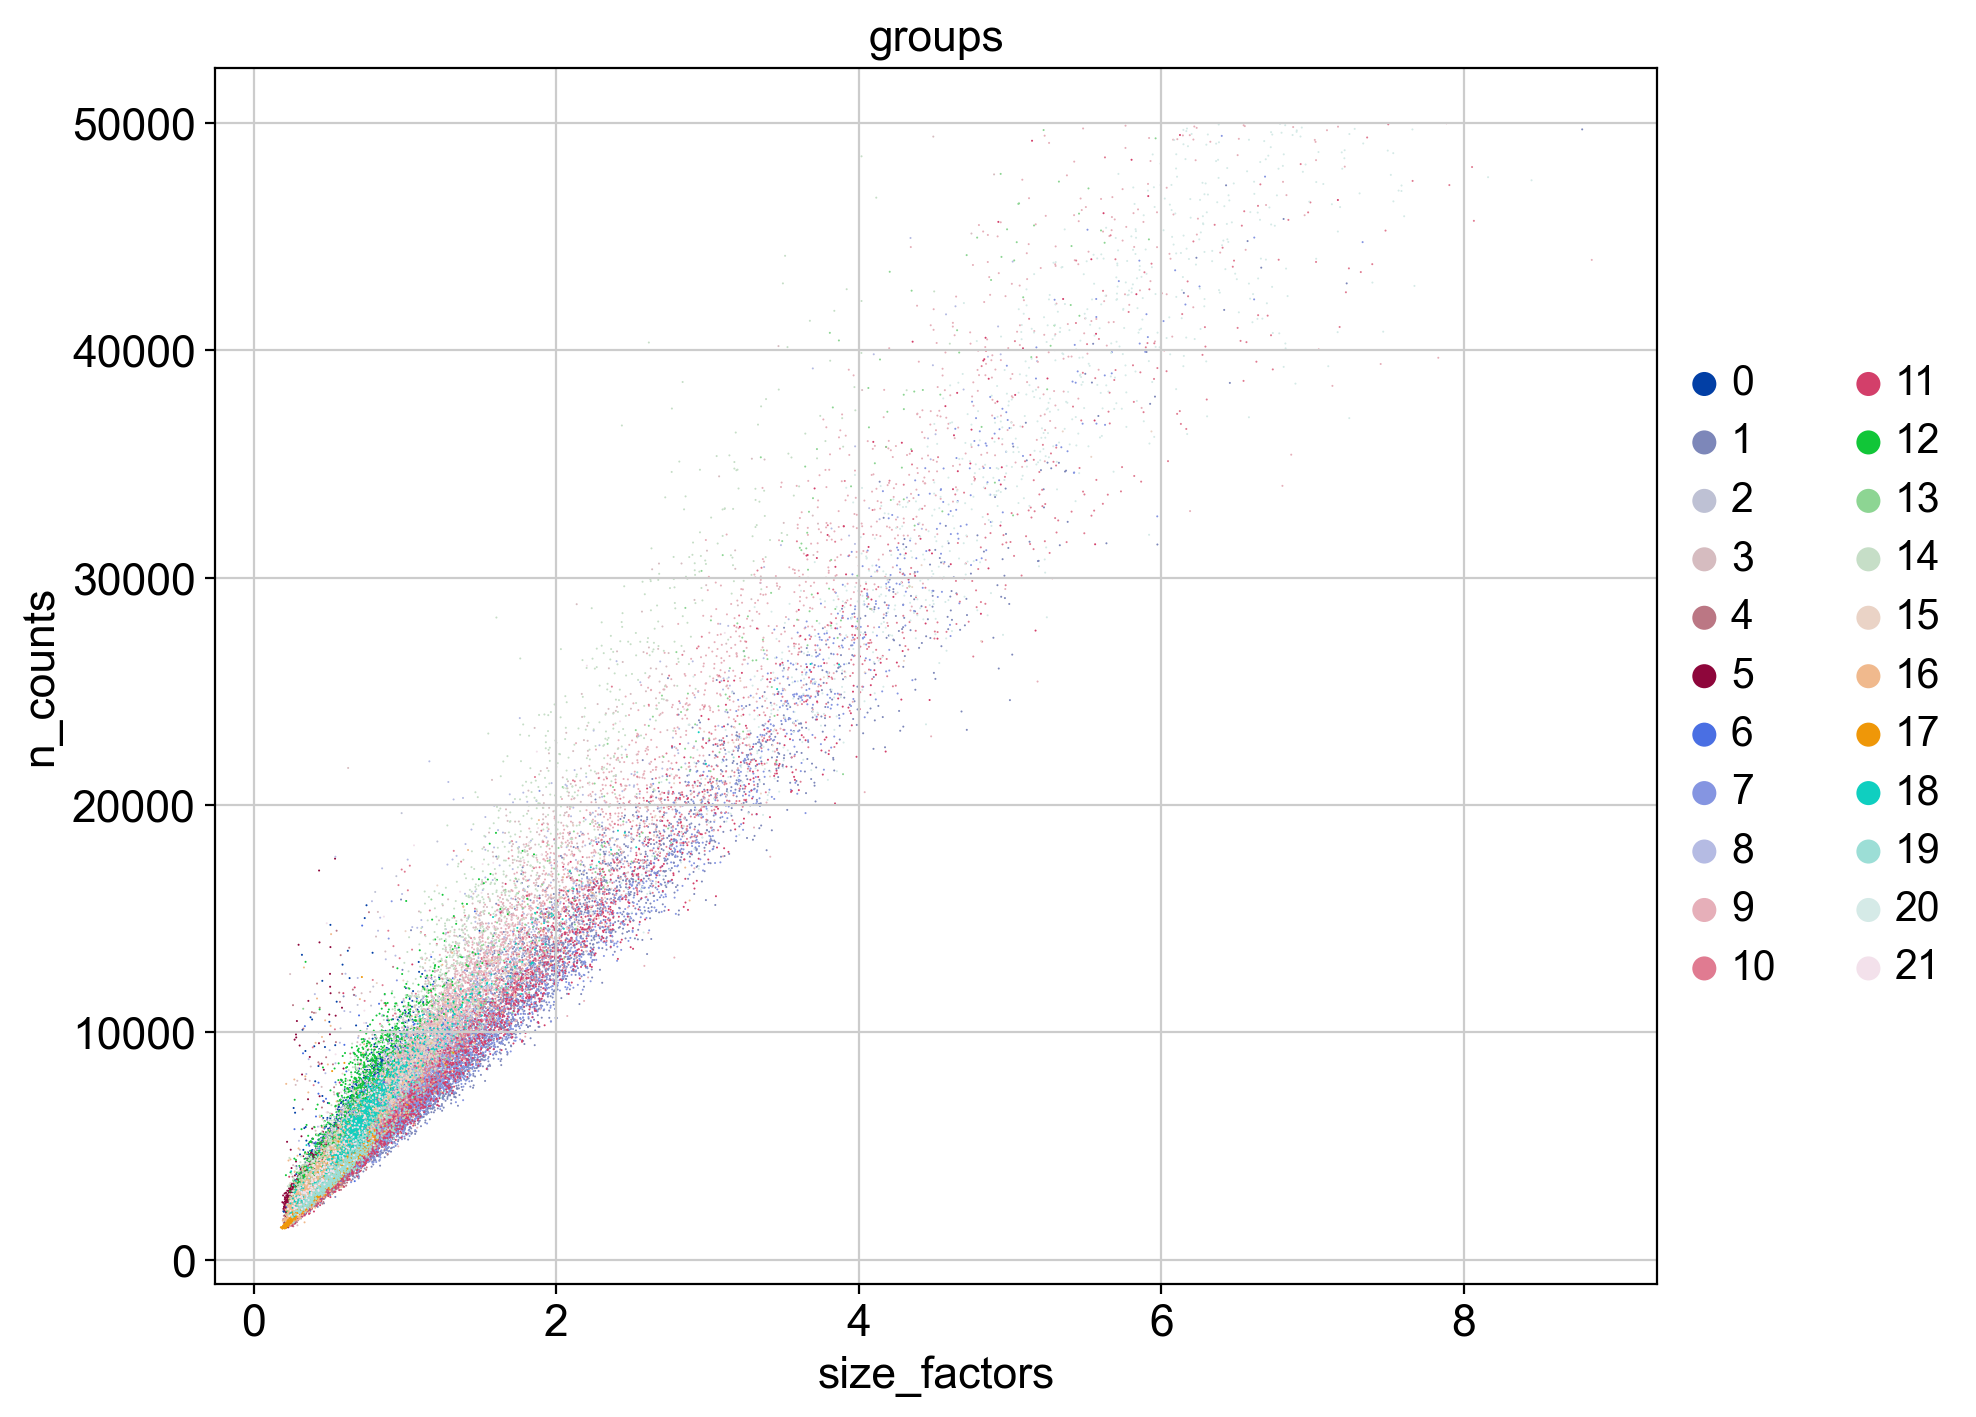

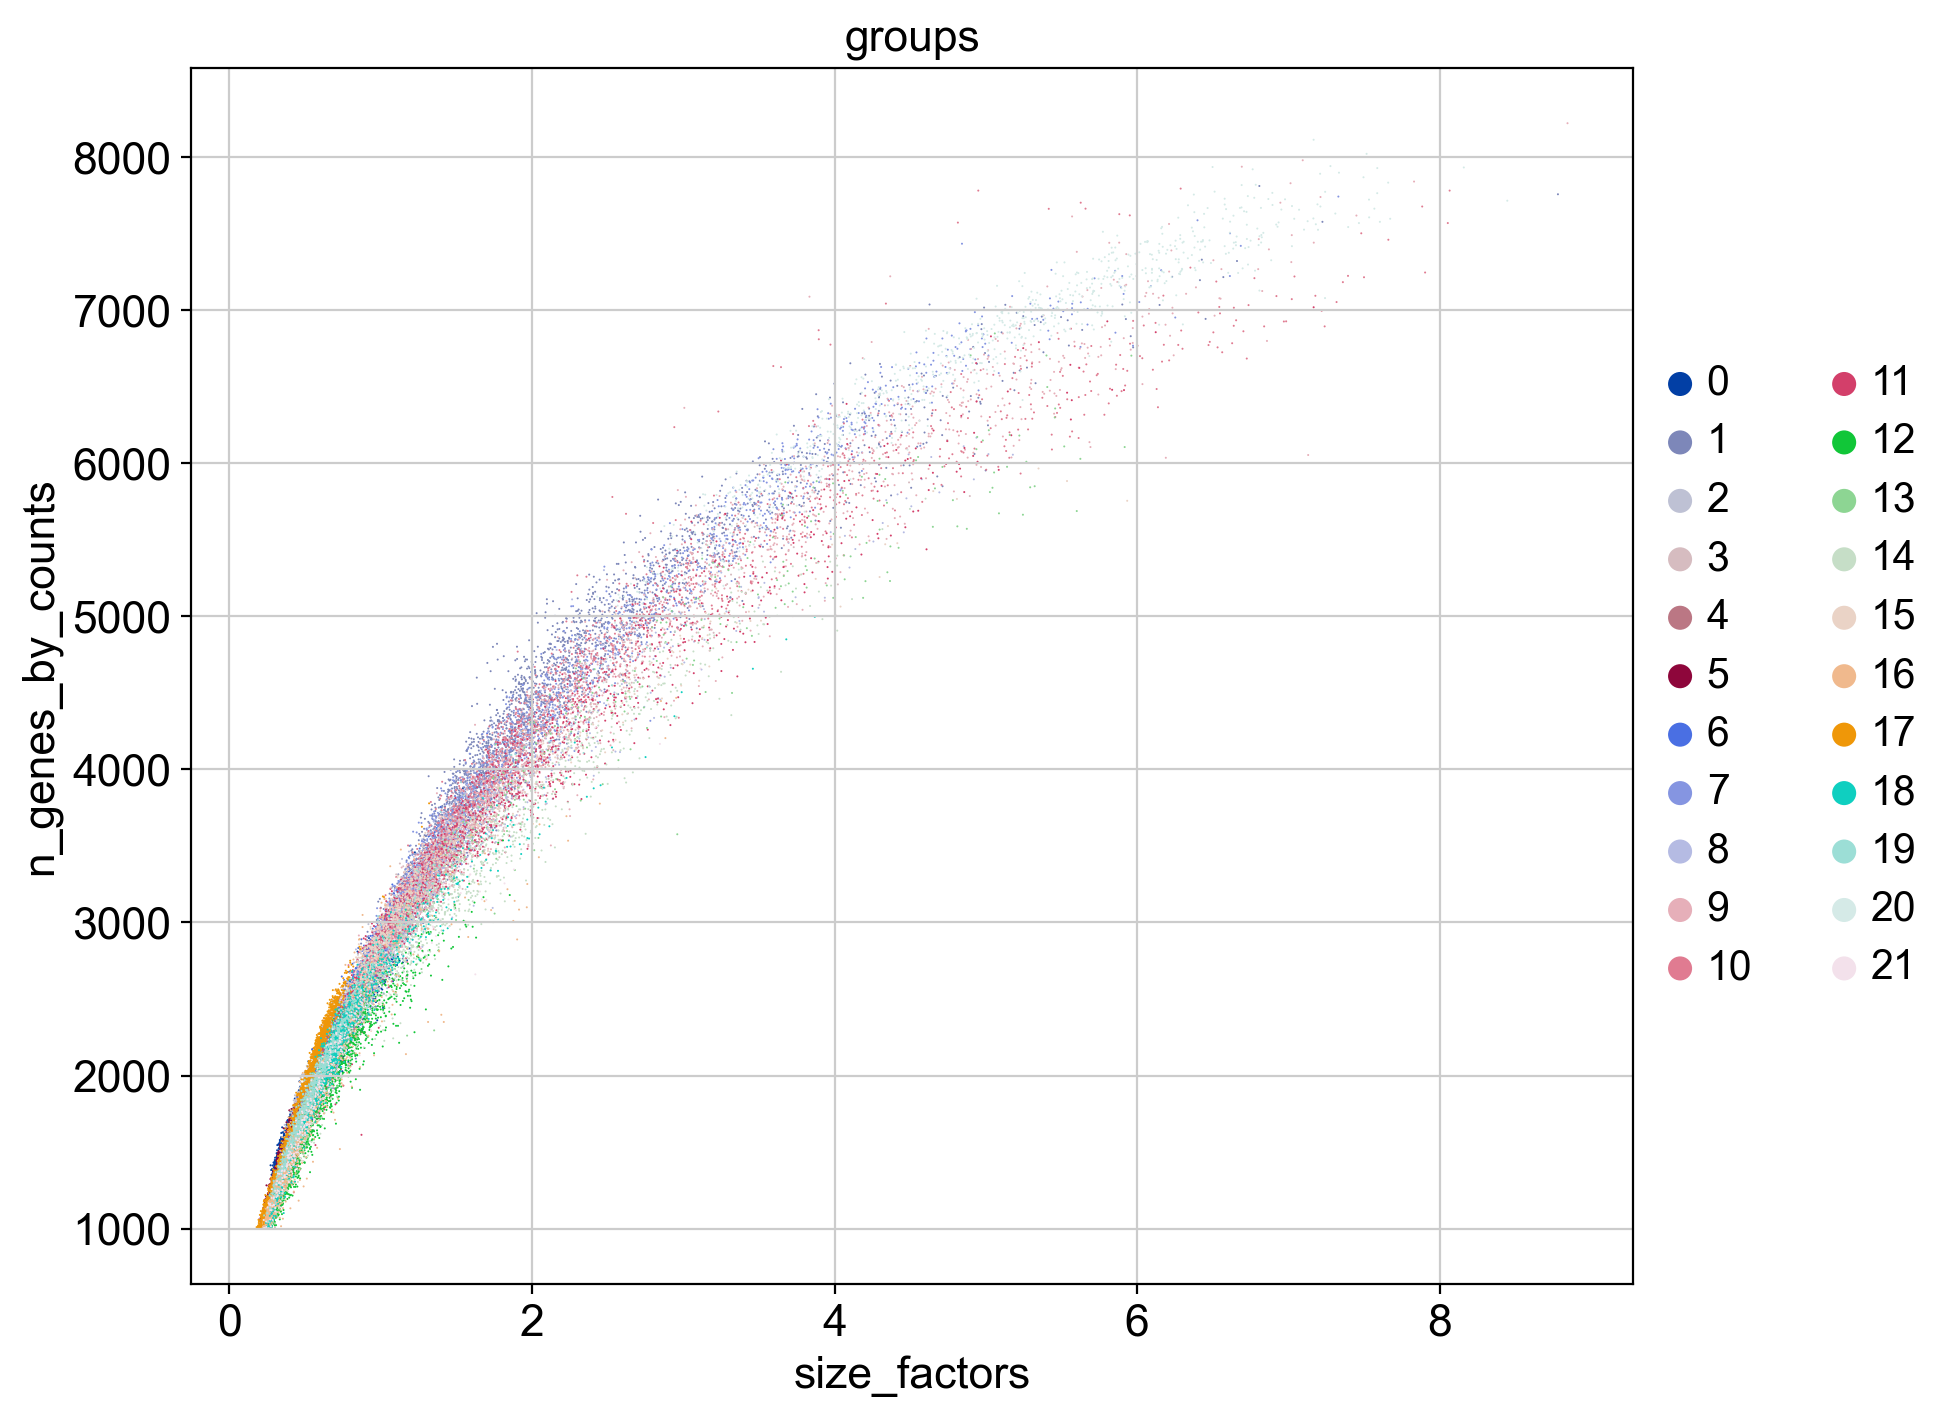

In [68]:
sc.pl.scatter(adata_pp, 'size_factors', 'n_counts', color='groups')
sc.pl.scatter(adata_pp, 'size_factors', 'n_genes_by_counts', color='groups')

In [69]:
sb.distplot(size_factors, bins=50, kde=False)
plt.show()

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Normalize with scran size-factors and log-scale. 

In [70]:
adata.X /= adata.obs['size_factors'].values[:,None]
sc.pp.log1p(adata)

Modify the format of the resulting data matrix.

In [71]:
adata.X = np.asarray(adata.X)

Free memory.

In [72]:
del adata_pp

Of note, we convert the gene expression matrix X to the sparse format to memory.

In [73]:
import scipy.sparse as sparse

In [74]:
adata.X = sparse.csr_matrix(adata.X)

In [75]:
adata.raw = adata.copy()

In [76]:
#Keep the count data in a counts layer
adata.layers["counts_lognorm"] = adata.X.copy()

In [77]:
adata

AnnData object with n_obs × n_vars = 56786 × 19290
    obs: 'sample_id', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'doublet_score', 'doublet', 'size_factors'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'sample_id_colors', 'log1p'
    layers: 'counts', 'counts_lognorm'

In [78]:
adata.write(data_dir +today+ 'data_postnorm_all_earlytp.h5ad', compression='gzip')

In [79]:
data_dir+today+ 'data_postnorm_all_earlytp.h5ad'

'/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/Revision/data/230516data_postnorm_all_earlytp.h5ad'